In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_noise1 = pd.read_excel("DatosInterferometria/ruido1.xlsx")
df_noise2 = pd.read_excel("DatosInterferometria/ruido2.xlsx")

In [3]:
from utils.clean_to_num_df import procesar_owon

metadata1, data_noise1 = procesar_owon(df_noise1)
metadata2, data_noise2 = procesar_owon(df_noise2)

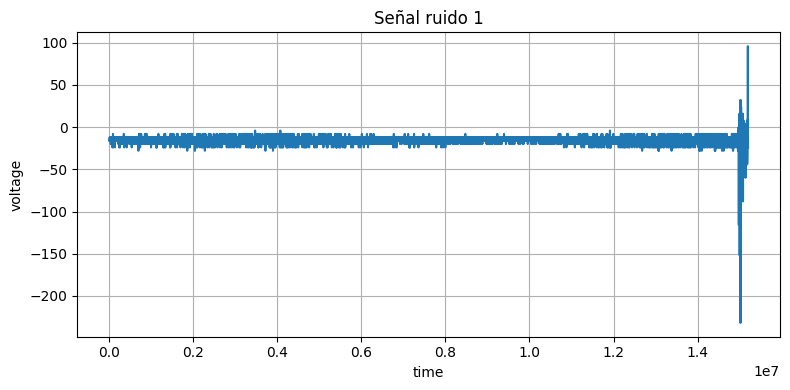

In [4]:
from utils.plot_df import plot_df

plot_df(data_noise1, "time", "voltage", title="Señal ruido 1")

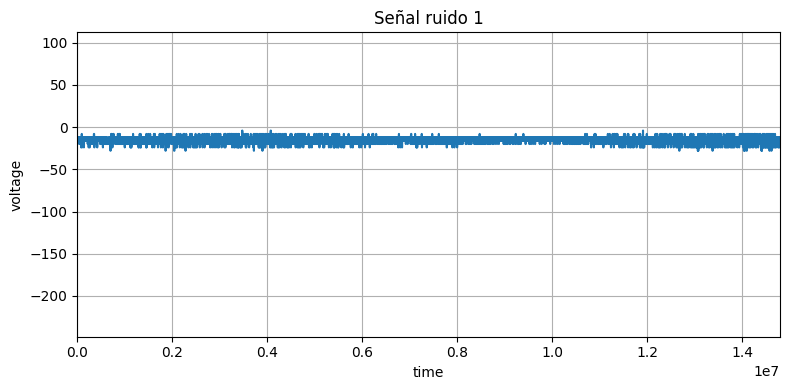

In [5]:
plot_df(data_noise1, "time", "voltage", xlim=[0,1.48e7], title="Señal ruido 1")

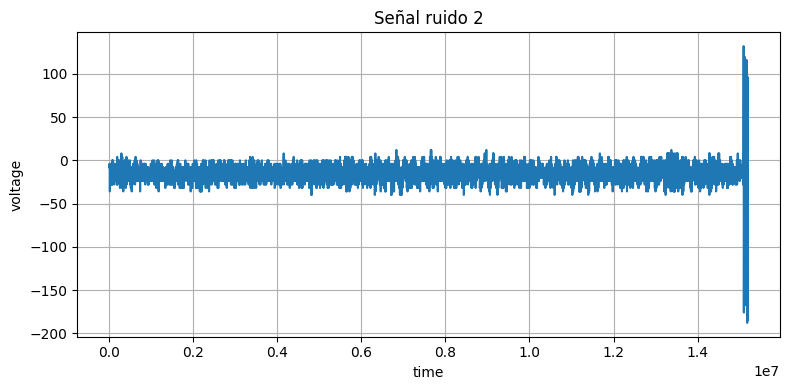

In [6]:
plot_df(data_noise2, "time", "voltage", title="Señal ruido 2")

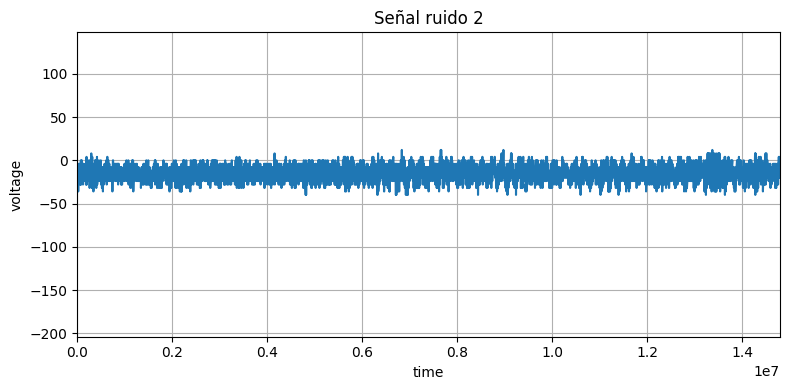

In [7]:
plot_df(data_noise2, "time", "voltage", xlim=[0,1.48e7],  title="Señal ruido 2")

In [8]:
cl_data_noise1 = data_noise1[data_noise1<=1.48e7]
cl_data_noise2 = data_noise2[data_noise2<=1.48e7]

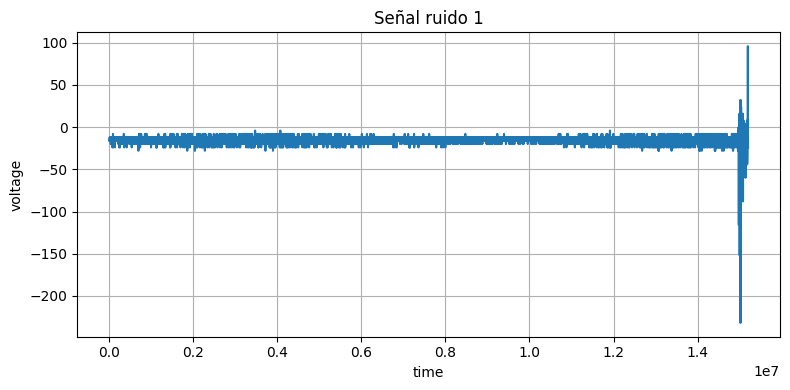

In [9]:
plot_df(data_noise1, "time", "voltage", title="Señal ruido 1")

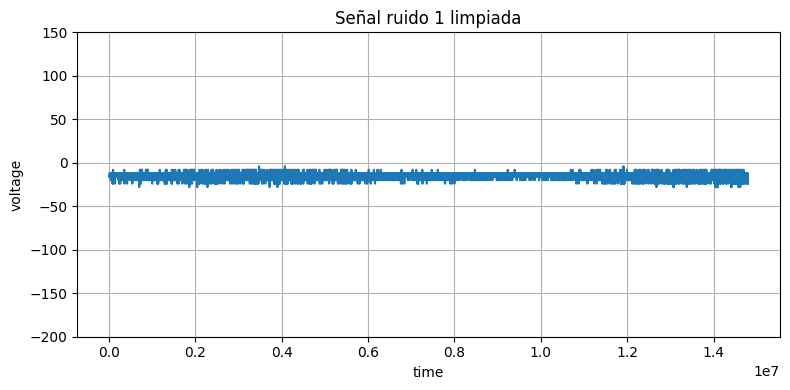

In [10]:
plot_df(cl_data_noise1, "time", "voltage", ylim=[-200,150], title="Señal ruido 1 limpiada")

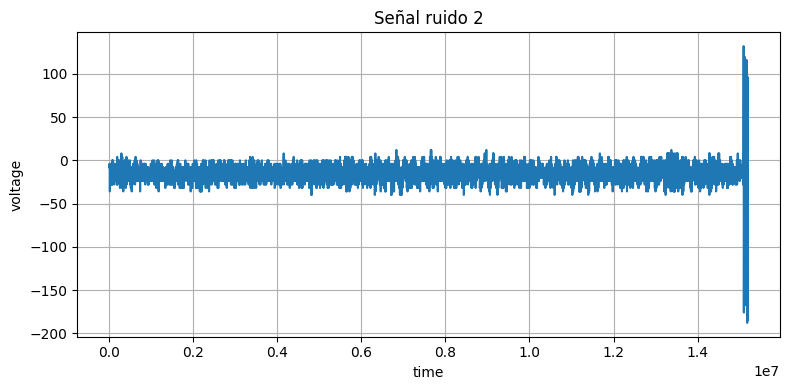

In [11]:
plot_df(data_noise2, "time", "voltage", title="Señal ruido 2")

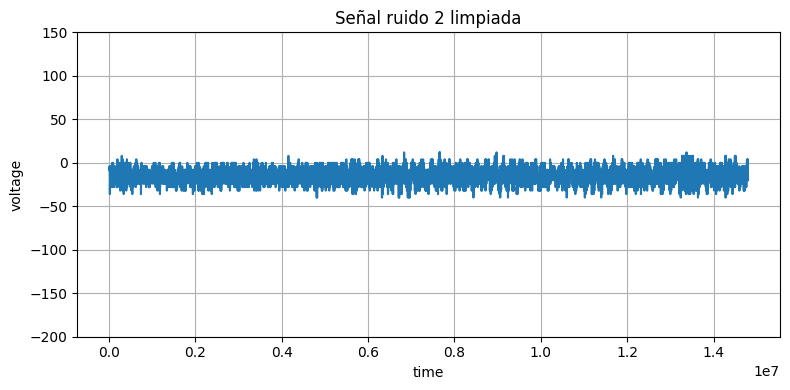

In [12]:
plot_df(cl_data_noise2, "time", "voltage", ylim=[-200,150], title="Señal ruido 2 limpiada")

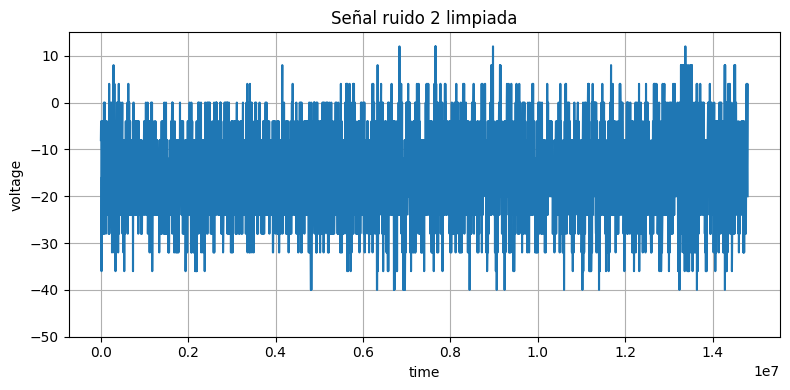

In [13]:
plot_df(cl_data_noise2, "time", "voltage", ylim=[-50,15], title="Señal ruido 2 limpiada")

Luego de limpiar los valores asociados al toque del botón que afecta ampliamente la señal, se debe centrar en 0 los dos archivos de ruido para lo cuál se define el promedio de cada uno y luego se hace la translación respecto al 0. Luego se debe definir los valores de los picos superiores e inferiores para determinar el aporte real del ruido.

In [14]:
from utils.calibrate_df import centering_voltage

center_noise1, dispNoise1 = centering_voltage(cl_data_noise1)

 Valor central original -15.400000229477882


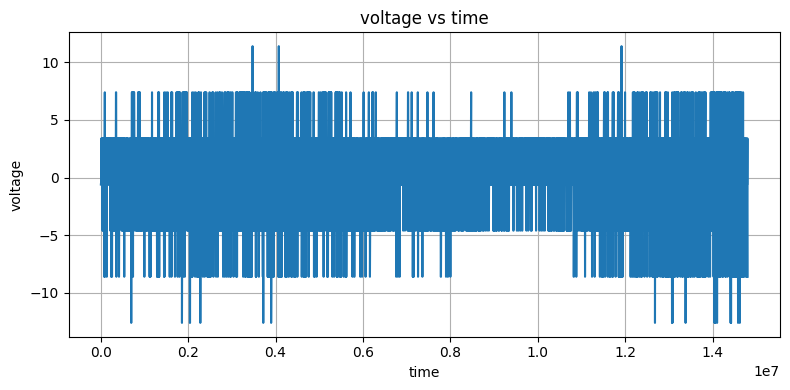

In [15]:
plot_df(center_noise1, "time", "voltage")

Ahora bien, para determinar los aportes que hace sin tener que calcular todos los valores de máximos y mínimos, se puede hacer un corte sobre el 0 y calcular el promedio de todos los valores mayores que 0 y todos los valores menores que 0, este sería también el promedio de los máximos y el promedio de los mínimos respectivamente.

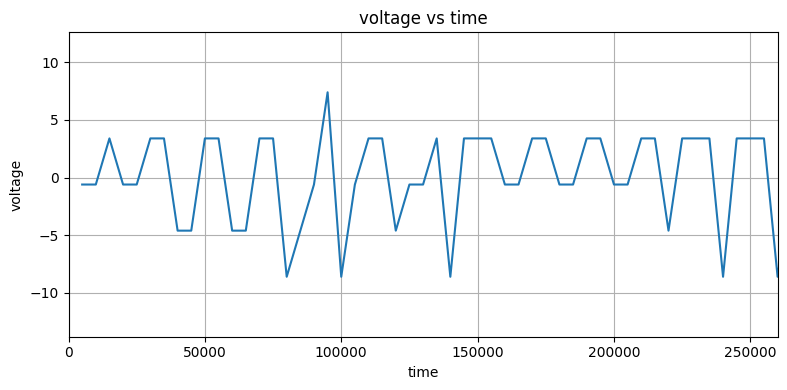

In [16]:
plot_df(center_noise1, "time", "voltage", xlim=[0.0, 0.26e6])

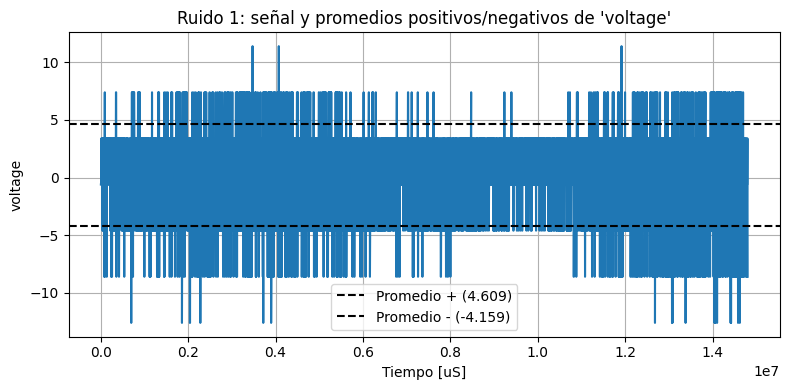

In [17]:
from utils.calibrate_df import mean_pos_neg

disp_neg_r1, disp_pos_r1 = mean_pos_neg(center_noise1, "voltage", "Ruido 1")

In [18]:
center_noise2, dispNoise2 = centering_voltage(cl_data_noise2)

 Valor central original -15.023684434396657


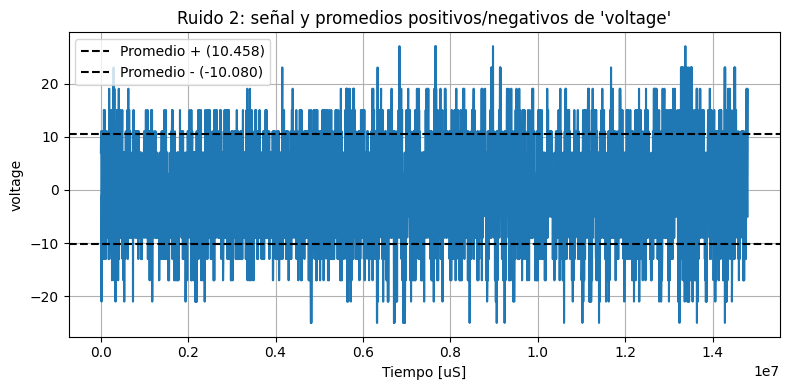

In [19]:
disp_neg_r2, disp_pos_r2 = mean_pos_neg(center_noise2, "voltage", "Ruido 2")

Luego usamos el promedio de los dos valores de ruido para la resta de los demás

In [20]:
desp_neg = (disp_neg_r2 + disp_neg_r1) / 2
desp_pos = (disp_pos_r1 + disp_pos_r2) / 2

print(desp_neg, desp_pos)

-7.119562243209668 7.533716067144812


In [21]:
print(disp_neg_r1, disp_pos_r1, "\n")
print(disp_neg_r2, disp_neg_r2)

-4.159449373620174 4.609431414039555 

-10.07967511279916 -10.07967511279916


In [22]:
df_do1 = pd.read_excel("DatosInterferometria/do1.xlsx")
df_do2 = pd.read_excel("DatosInterferometria/do2.xlsx")
df_do3 = pd.read_excel("DatosInterferometria/do3.xlsx")
df_do4 = pd.read_excel("DatosInterferometria/do4.xlsx")
df_do5 = pd.read_excel("DatosInterferometria/do5.xlsx")
df_do6 = pd.read_excel("DatosInterferometria/do6.xlsx")

In [23]:
metado1, data_do1 = procesar_owon(df_do1)
metado2, data_do2 = procesar_owon(df_do2)
metado3, data_do3 = procesar_owon(df_do3)
metado4, data_do4 = procesar_owon(df_do4)
metado5, data_do5 = procesar_owon(df_do5)
metado6, data_do6 = procesar_owon(df_do6)

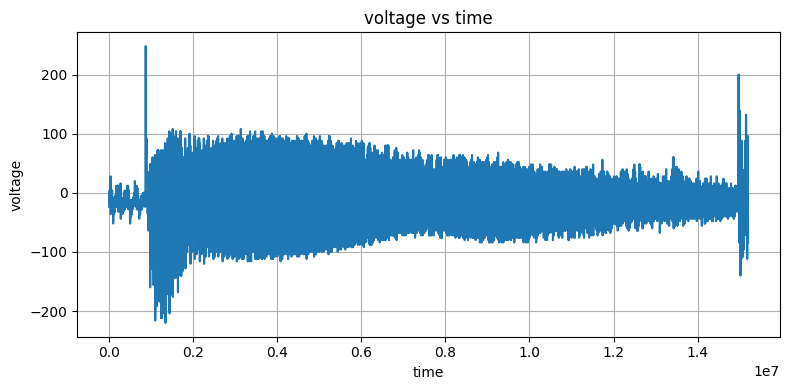

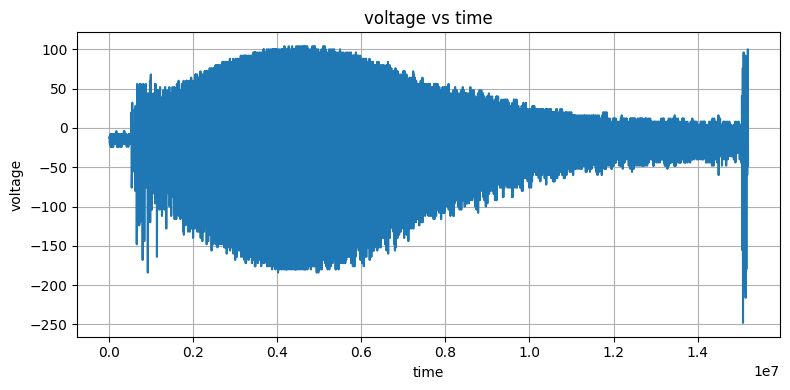

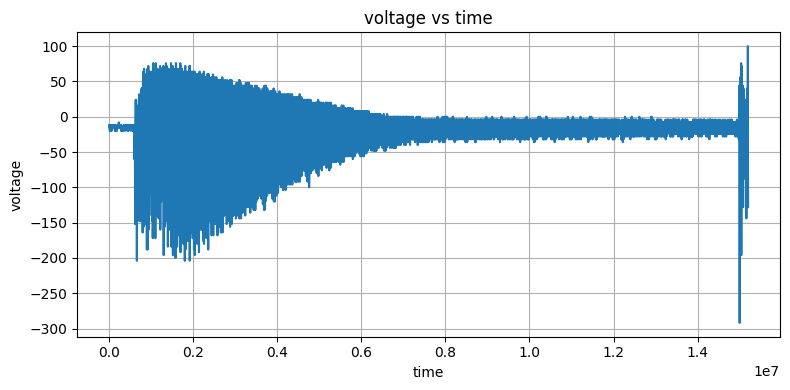

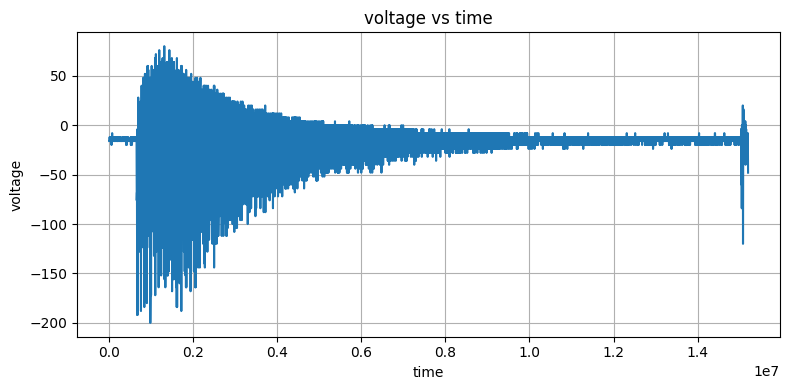

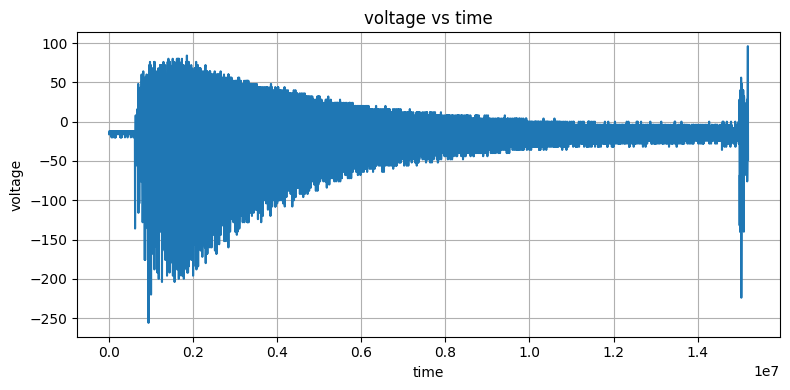

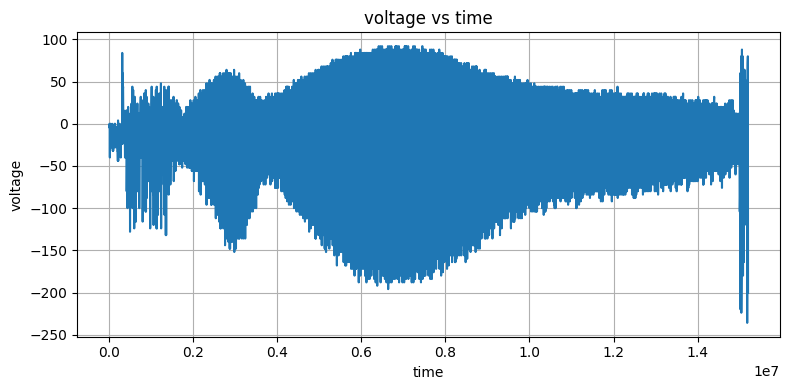

In [24]:
dfs_do = [data_do1, data_do2, data_do3, data_do4, data_do5, data_do6]

for df in dfs_do:
    plot_df(df, "time", "voltage")

Es necesario según se muestra procesar cada uno por separado, debido a que el tiempo en el que las vibraciones comienzan parece ser diferente para todas y también es necesario definir el centro de la vibración respecto a ese cero local, para luego reposicionar en el 0 la vibración.

El hecho de que el zero local vuelva a ser el punto de equilibrio luego de que la vibración va desapareciendo muestra que la vibración tiene una clara orientación en los valores de voltaje que en este caso parecen tener una dirección negativa, la cuál es necesario interpretar físicamente con el sentido del golpe.

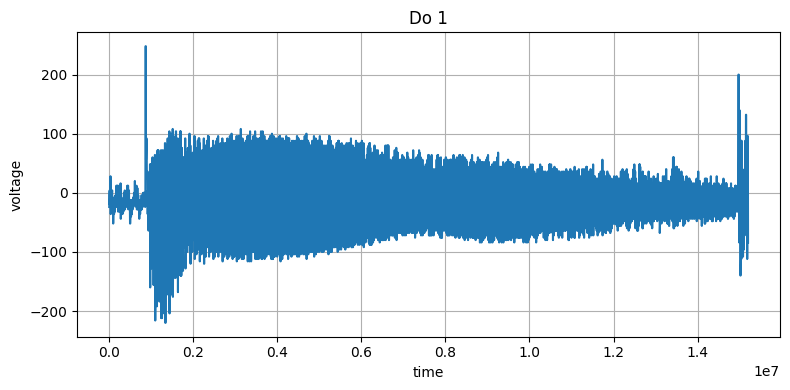

In [25]:
plot_df(data_do1, "time", "voltage", title="Do 1")

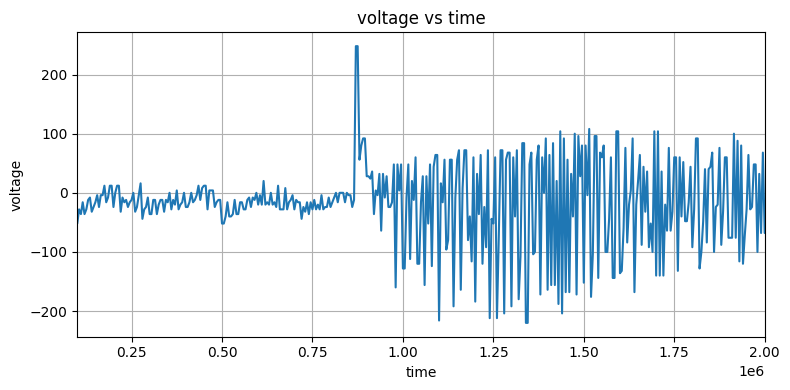

In [26]:
plot_df(data_do1, "time", "voltage", xlim = [0.1e6, 0.2e7])

In [27]:
zero_do1 = data_do1[data_do1["time"]<0.8e6]

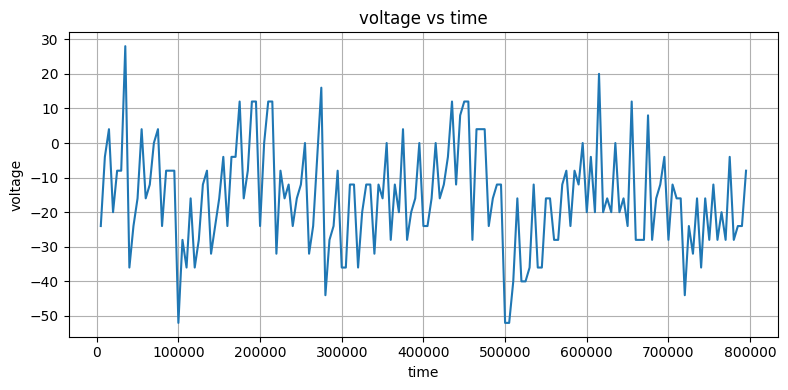

In [28]:
plot_df(zero_do1, "time", "voltage")

In [29]:
zero_do1f, dispDo1 = centering_voltage(zero_do1)

 Valor central original -15.572327276070913


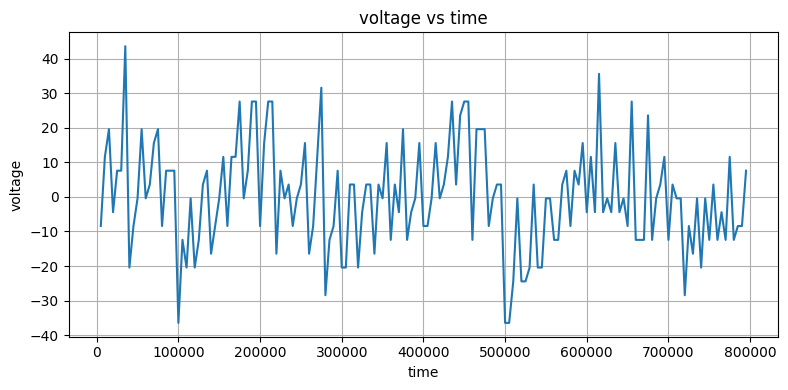

In [30]:
plot_df(zero_do1f)

Centramos respecto al 0 calculado anteriormente y luego eliminamos la parte final que es común a todos y que va desde 1.4e7 en adelante

In [31]:
from utils.calibrate_df import move_voltage

center_do1 = move_voltage(data_do1[data_do1["time"]<1.4e7],
                          displacement=dispDo1)

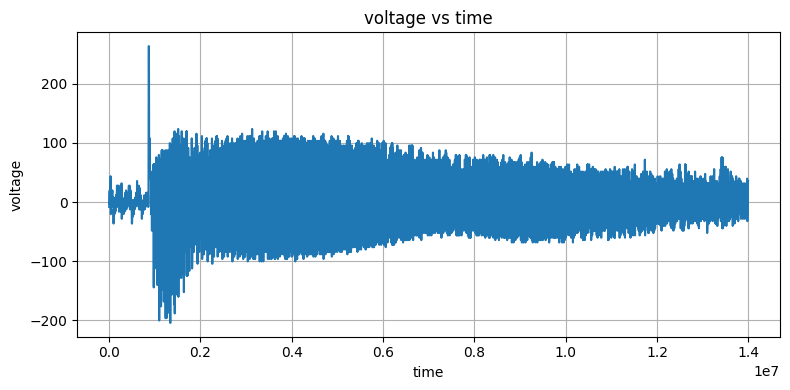

In [32]:
plot_df(center_do1)

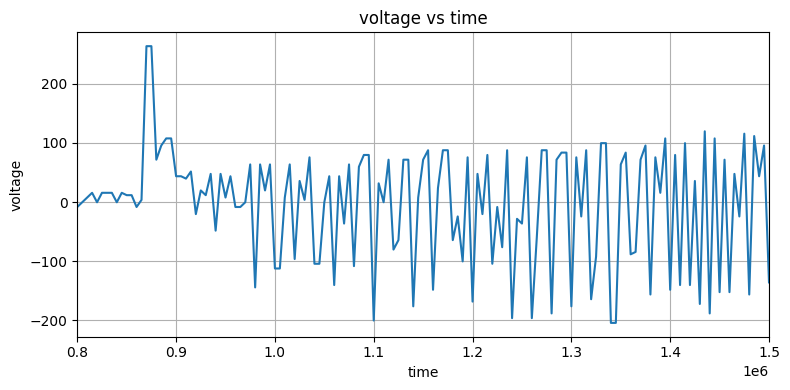

In [33]:
plot_df(center_do1, xlim=[0.8e6, 1.5e6])

In [34]:
cl_do1 = center_do1[center_do1["time"]>0.9e6]

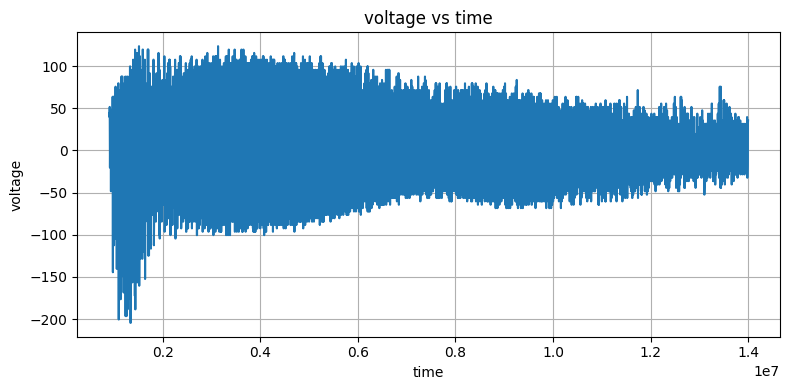

In [35]:
plot_df(cl_do1)

In [36]:
from utils.calibrate_df import sustraction_noise_pos_neg

dV_m = desp_neg
dV_p = desp_pos

calibrate_do1 = sustraction_noise_pos_neg(cl_do1, dV_m, dV_p)

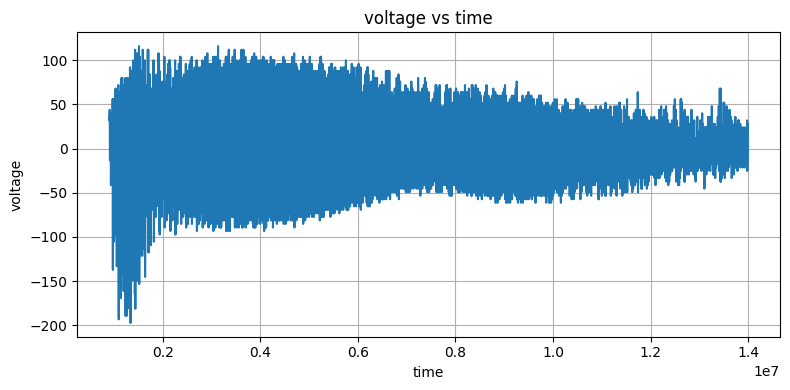

In [37]:
plot_df(calibrate_do1)

In [38]:
calibrate_do1.head(5)

time    voltage
index                     
181    905000.0  36.038612
182    910000.0  32.038612
183    915000.0  44.038612
184    920000.0 -13.308111
185    925000.0  12.038611

In [39]:
calibrate_do1 = calibrate_do1.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

In [40]:
calibrate_do1.head(5)

time_uS  Voltage_mV
index                      
181    905000.0   36.038612
182    910000.0   32.038612
183    915000.0   44.038612
184    920000.0  -13.308111
185    925000.0   12.038611

In [41]:
calibrate_do1.to_csv("calibrate_do1.csv", index=False)

## DO 2

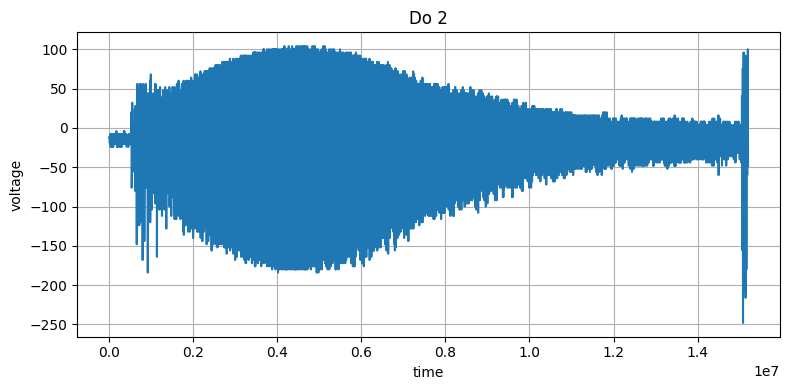

In [42]:
plot_df(data_do2, "time", "voltage", title="Do 2")

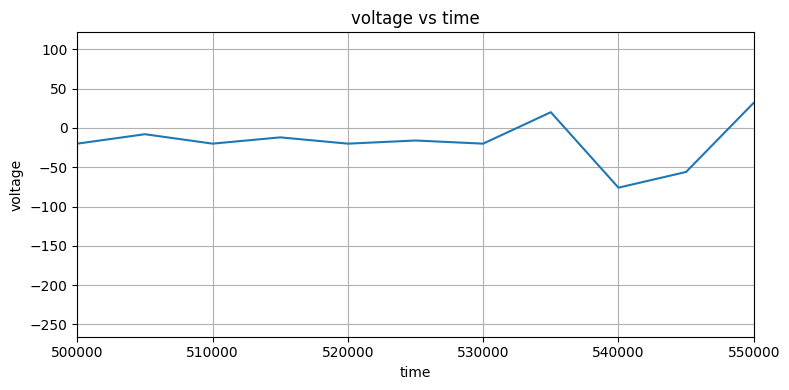

In [43]:
plot_df(data_do2, "time", "voltage", xlim = [0.5e6, 0.55e6])

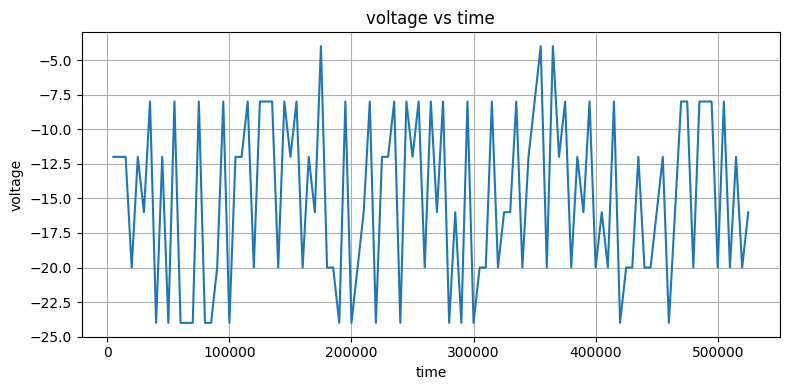

In [44]:
zero_do2 = data_do2[data_do2["time"]<0.53e6]
plot_df(zero_do2, "time", "voltage")

 Valor central original -14.93333355585734


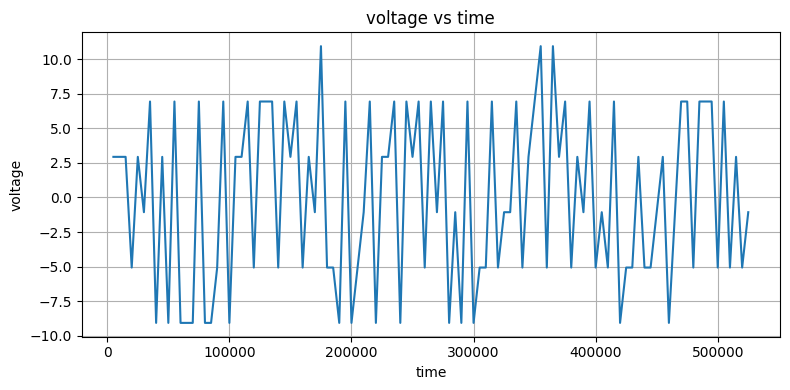

In [45]:
zero_do2f, dispDo2 = centering_voltage(zero_do2)
plot_df(zero_do2f)

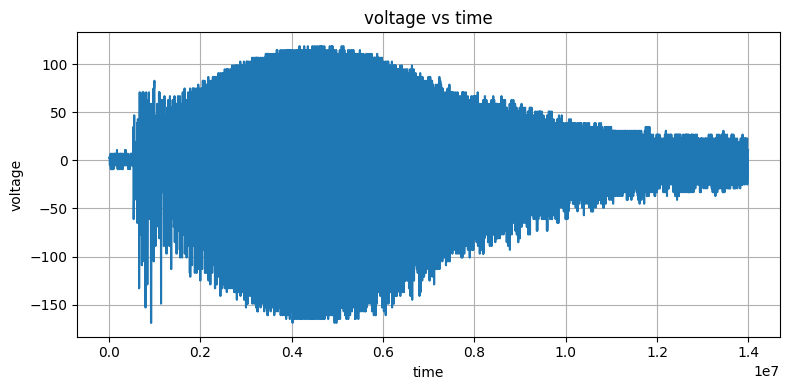

In [46]:
from utils.calibrate_df import move_voltage

center_do2 = move_voltage(data_do2[data_do2["time"]<1.4e7],
                          displacement=dispDo2)
plot_df(center_do2)

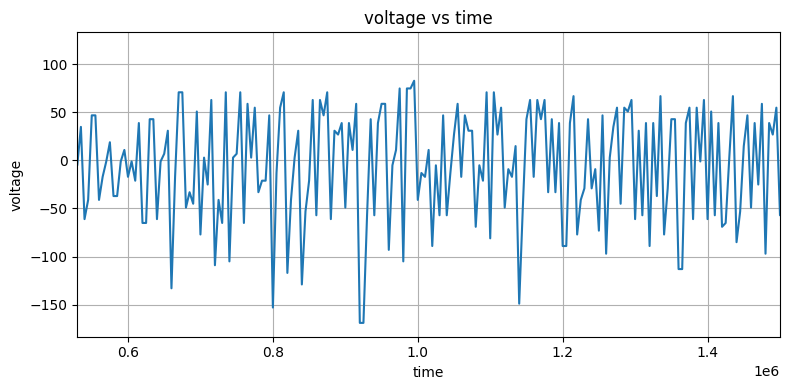

In [47]:
plot_df(center_do2, xlim=[0.53e6, 1.5e6])

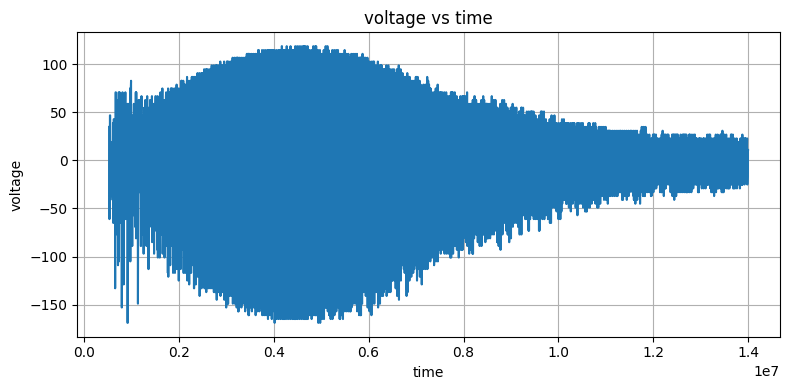

In [48]:
cl_do2 = center_do2[center_do2["time"]>0.53e6]
plot_df(cl_do2)

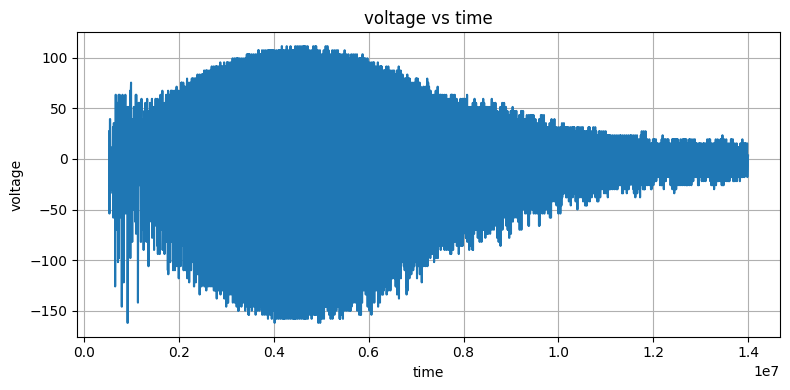

In [49]:
calibrate_do2 = sustraction_noise_pos_neg(cl_do2, dV_m, dV_p)
plot_df(calibrate_do2)

In [50]:
calibrate_do2 = calibrate_do2.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

In [51]:
calibrate_do2.head(5)

time_uS  Voltage_mV
index                      
107    535000.0   27.399618
108    540000.0  -53.947105
109    545000.0  -33.947105
110    550000.0   39.399618
111    555000.0   39.399618

In [52]:
calibrate_do2.to_csv("calibrate_do2.csv", index=False)

## DO 3

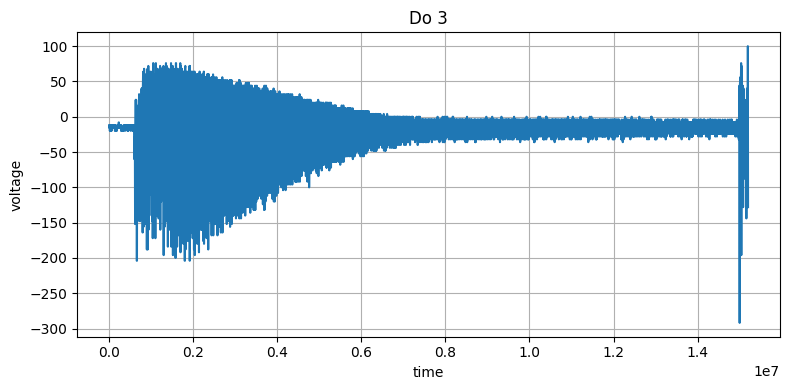

In [53]:
plot_df(data_do3, "time", "voltage", title="Do 3")

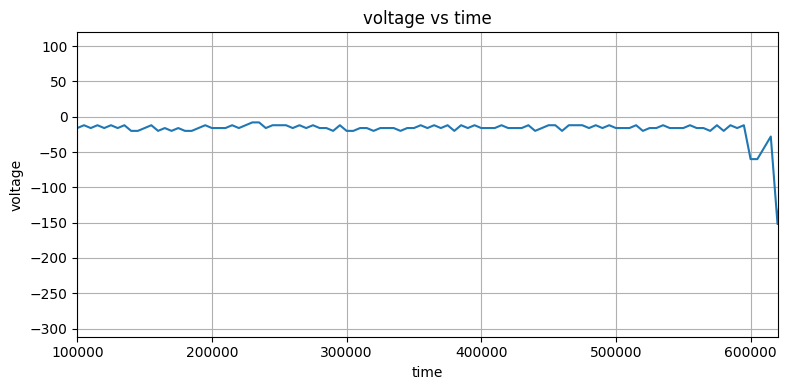

In [54]:
plot_df(data_do3, xlim = [0.1e6, 0.62e6])

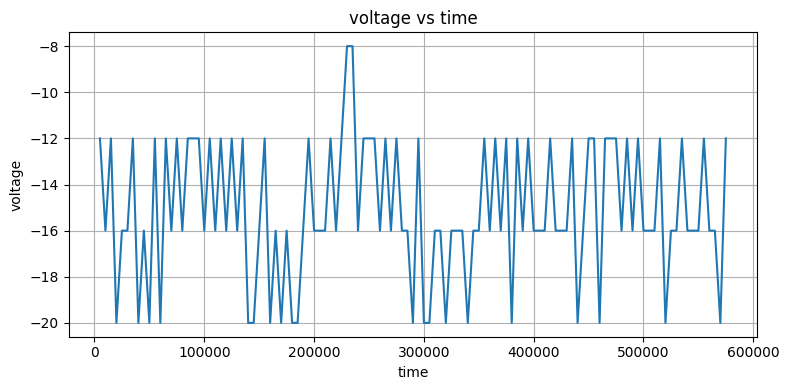

In [55]:
zero_do3 = data_do3[data_do3["time"]<0.58e6]
plot_df(zero_do3)

 Valor central original -15.130435008069743


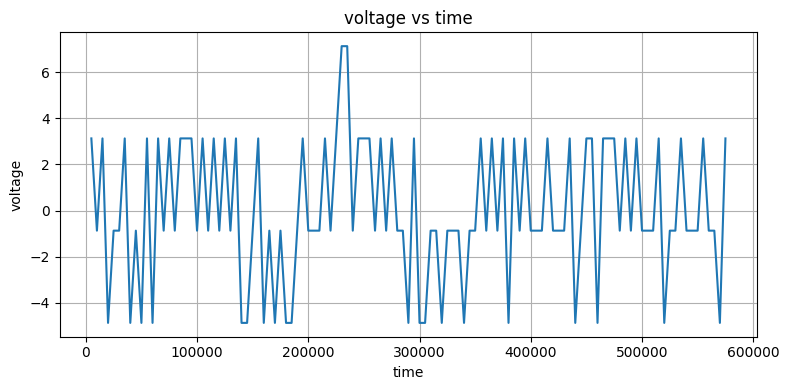

In [56]:
zero_do3f, dispDo3 = centering_voltage(zero_do3)
plot_df(zero_do3f)

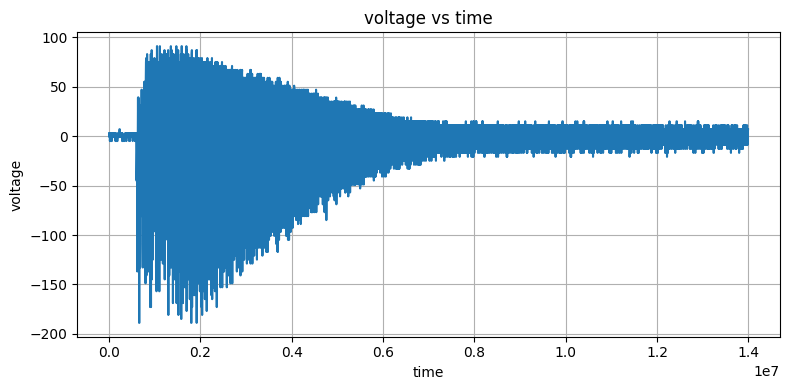

In [57]:
center_do3 = move_voltage(data_do3[data_do3["time"]<1.4e7],
                          displacement=dispDo3)

plot_df(center_do3)

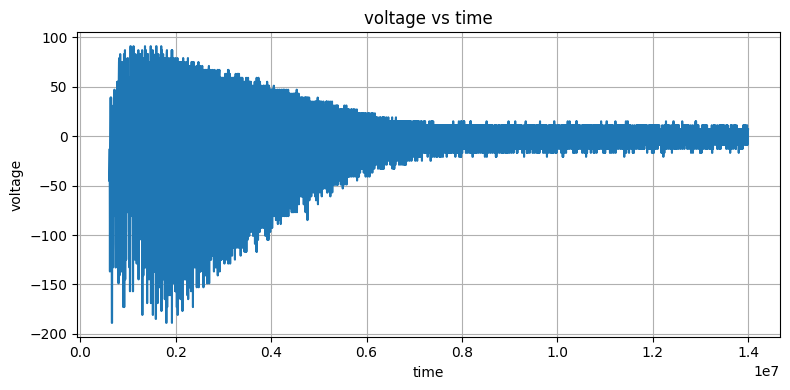

In [58]:
cl_do3 = center_do3[center_do3["time"]>0.6e6]

plot_df(cl_do3)

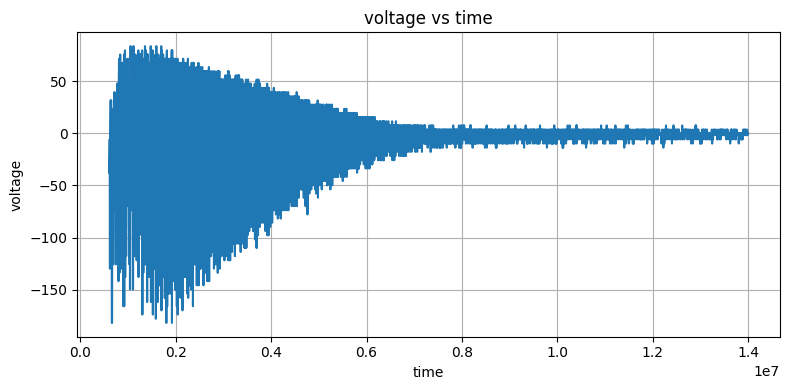

In [59]:
calibrate_do3 = sustraction_noise_pos_neg(cl_do3, dV_m, dV_p)

plot_df(calibrate_do3)

In [60]:
calibrate_do3 = calibrate_do3.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

In [61]:
calibrate_do3.head(5)

time_uS  Voltage_mV
index                      
121    605000.0  -37.750004
122    610000.0  -21.750003
123    615000.0   -5.750003
124    620000.0 -129.750005
125    625000.0  -21.750003

In [62]:
calibrate_do3.to_csv("calibrate_do3.csv", index=False)

## DO 4

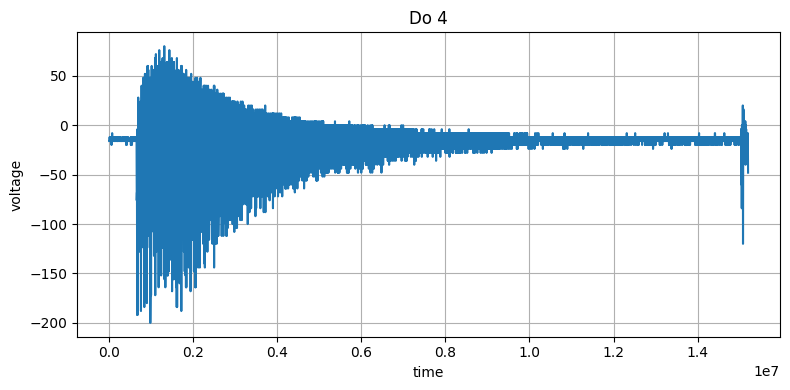

In [63]:
plot_df(data_do4, title="Do 4")

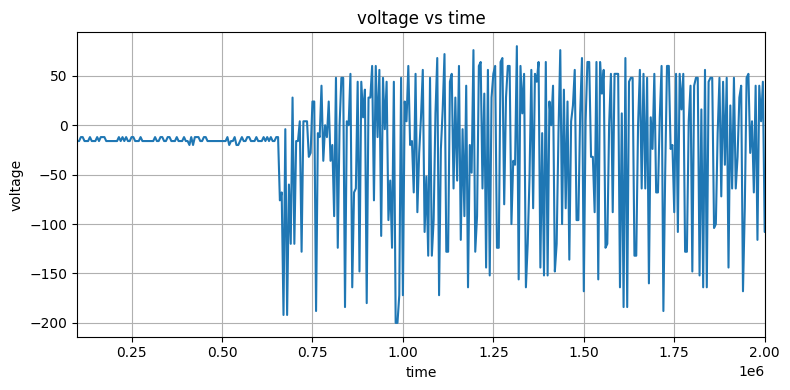

In [64]:
plot_df(data_do4, xlim = [0.1e6, 0.2e7])

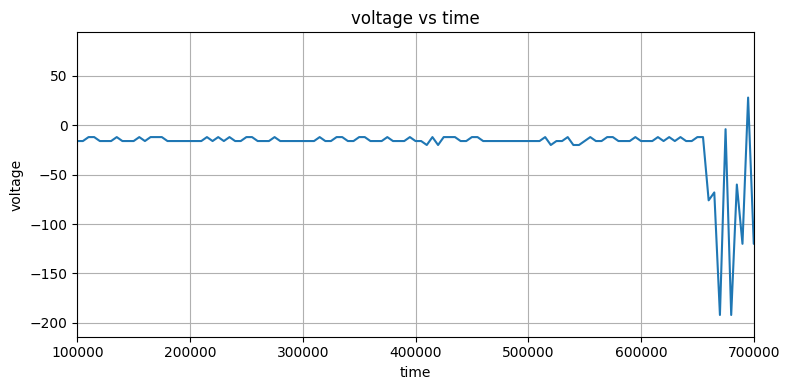

In [65]:
plot_df(data_do4, xlim = [0.1e6, 0.70e6])

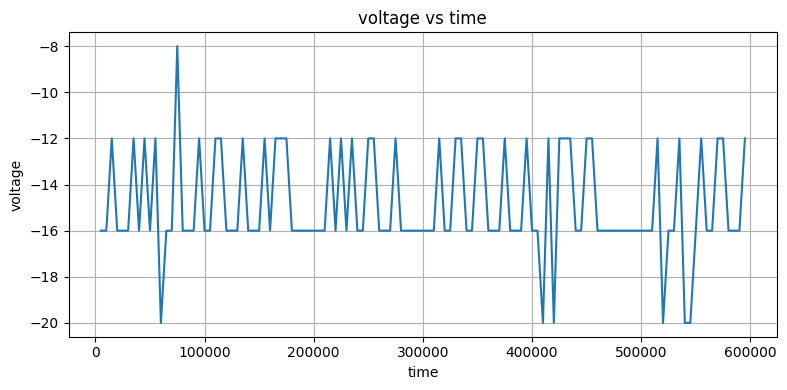

In [66]:
zero_do4 = data_do4[data_do4["time"]<0.6e6]
plot_df(zero_do4)

 Valor central original -14.890756524410568


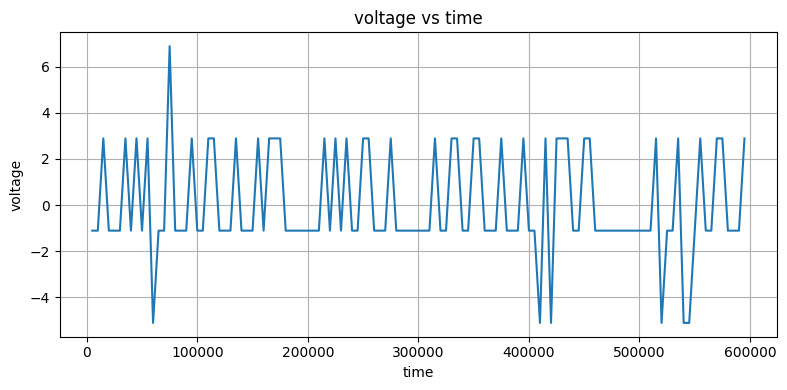

In [67]:
zero_do4f, dispDo4 = centering_voltage(zero_do4)
plot_df(zero_do4f)


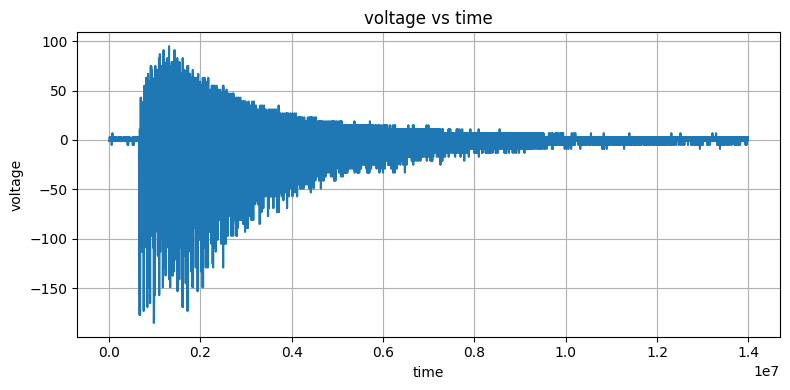

In [68]:
center_do4 = move_voltage(data_do4[data_do4["time"]<1.4e7],
                          displacement=dispDo4)
plot_df(center_do4)

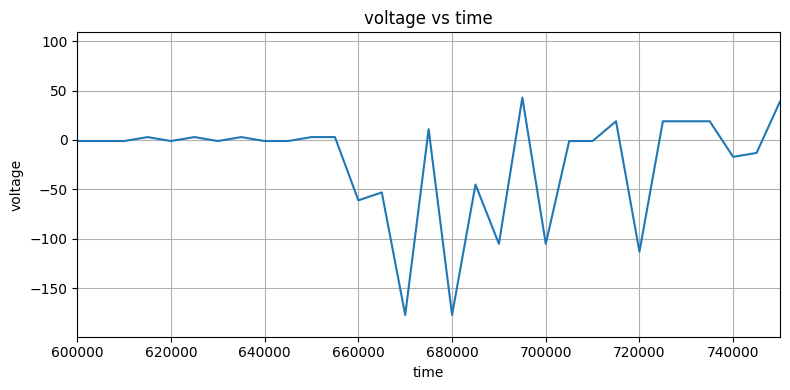

In [69]:
plot_df(center_do4, xlim=[0.6e6, 0.75e6])

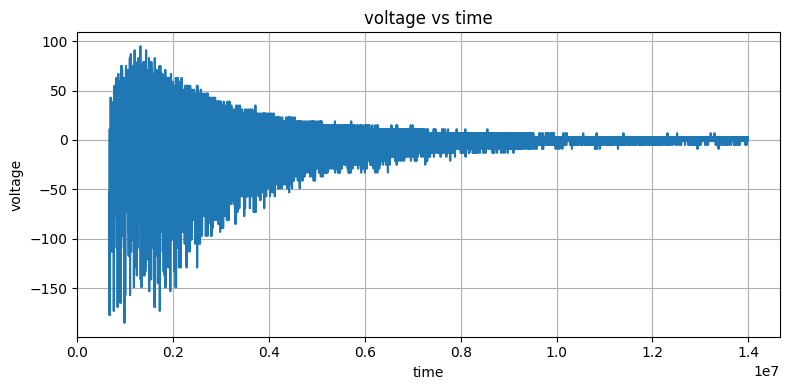

In [70]:
cl_do4 = center_do4[center_do4["time"]>0.66e6]
plot_df(cl_do4)

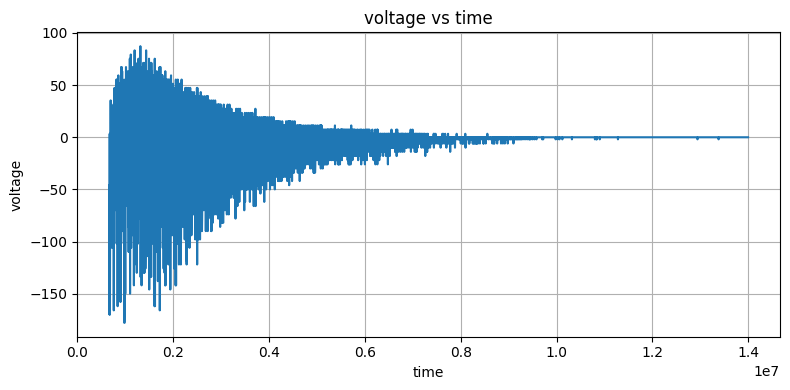

In [71]:
calibrate_do4 = sustraction_noise_pos_neg(cl_do4, dV_m, dV_p)
plot_df(calibrate_do4)

In [72]:
calibrate_do4 = calibrate_do4.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

In [73]:
print(dV_p, dV_m)

7.533716067144812 -7.119562243209668


In [74]:
calibrate_do4.head(5)

time_uS  Voltage_mV
index                      
133    665000.0  -45.989682
134    670000.0 -169.989684
135    675000.0    3.357040
136    680000.0 -169.989684
137    685000.0  -37.989682

In [75]:
calibrate_do4.to_csv("calibrate_do4.csv", index=False)

## DO 5

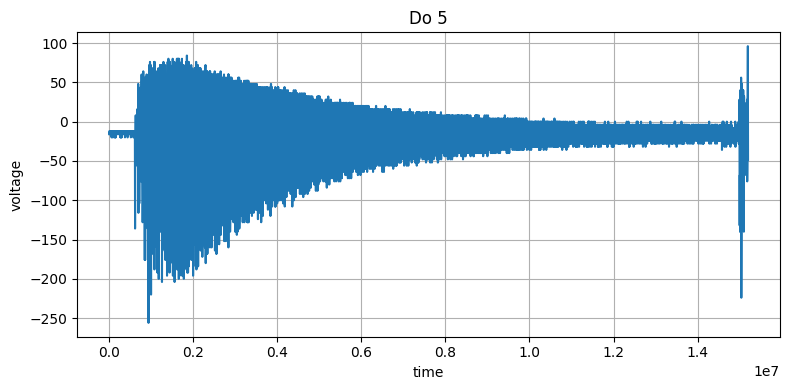

In [76]:
plot_df(data_do5, title="Do 5")

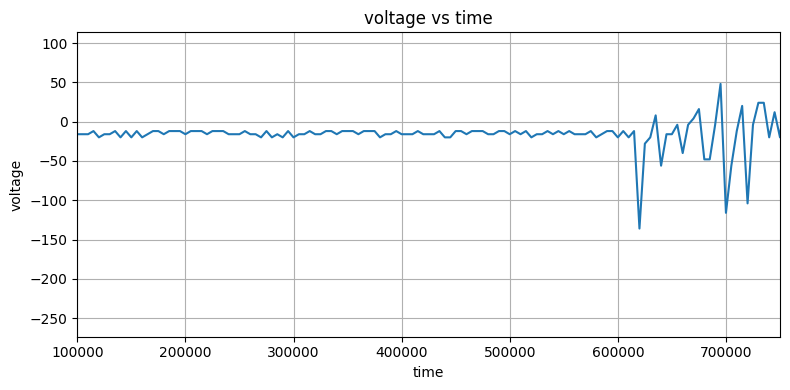

In [77]:
plot_df(data_do5, xlim = [0.1e6, 0.75e6])

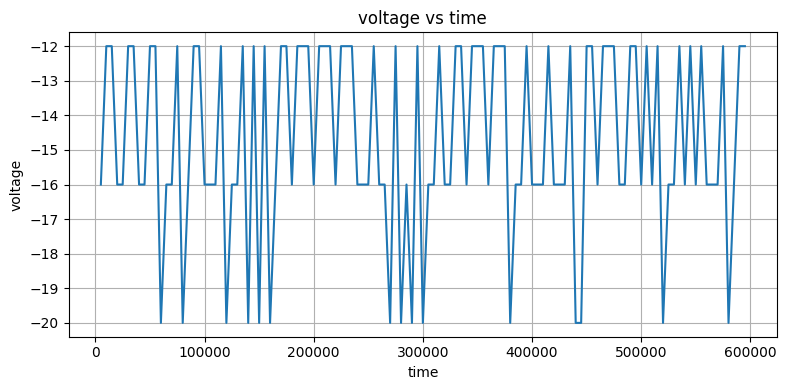

In [78]:
zero_do5 = data_do5[data_do5["time"]<0.6e6]
plot_df(zero_do5)

 Valor central original -14.689075849136385


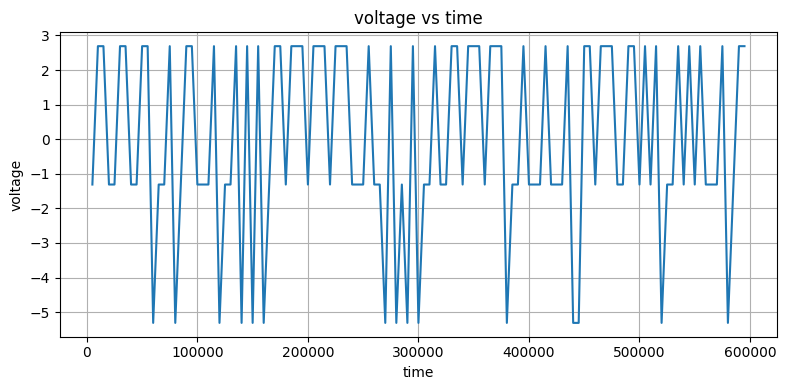

In [79]:
zero_do5f, dispDo5 = centering_voltage(zero_do5)
plot_df(zero_do5f)

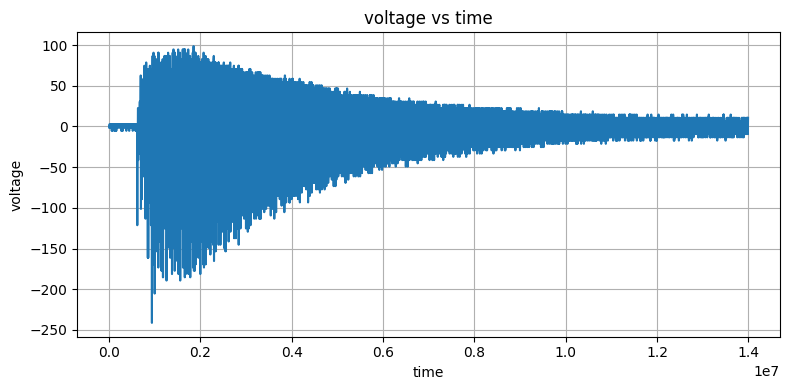

In [80]:
center_do5 = move_voltage(data_do5[data_do5["time"]<1.4e7],
                          displacement=dispDo5)
plot_df(center_do5)

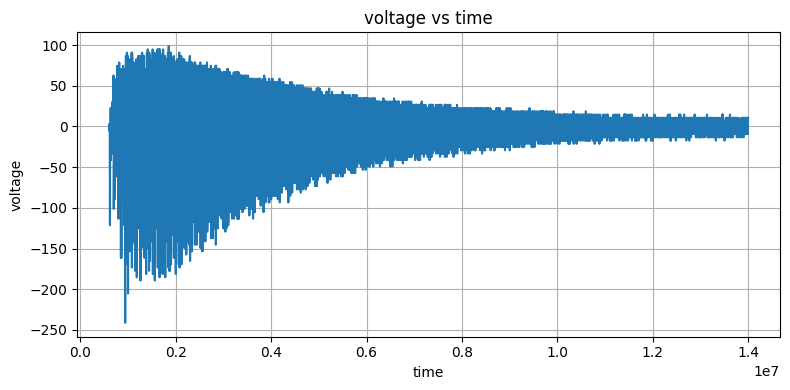

In [81]:
cl_do5 = center_do5[center_do5["time"]>0.6e6]
plot_df(cl_do5)

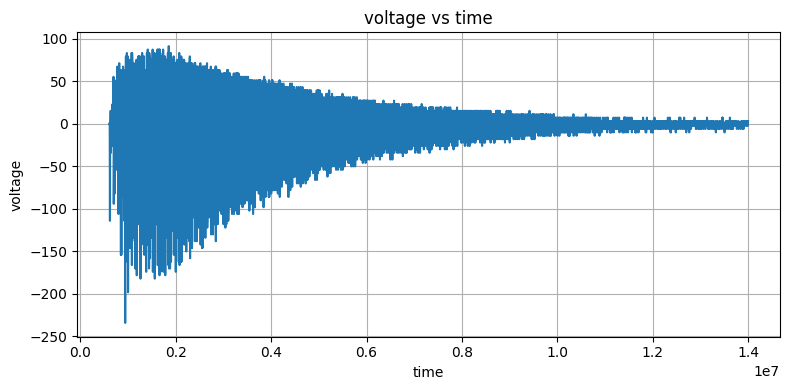

In [82]:
calibrate_do5 = sustraction_noise_pos_neg(cl_do5, dV_m, dV_p)
plot_df(calibrate_do5)

In [83]:
calibrate_do5 = calibrate_do5.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })


In [84]:
calibrate_do5.head()

time_uS  Voltage_mV
index                      
121    605000.0    0.000000
122    610000.0    0.000000
123    615000.0    0.000000
124    620000.0 -114.191364
125    625000.0   -6.191362

In [85]:
calibrate_do5.to_csv("calibrate_do5.csv", index=False)

## DO 6

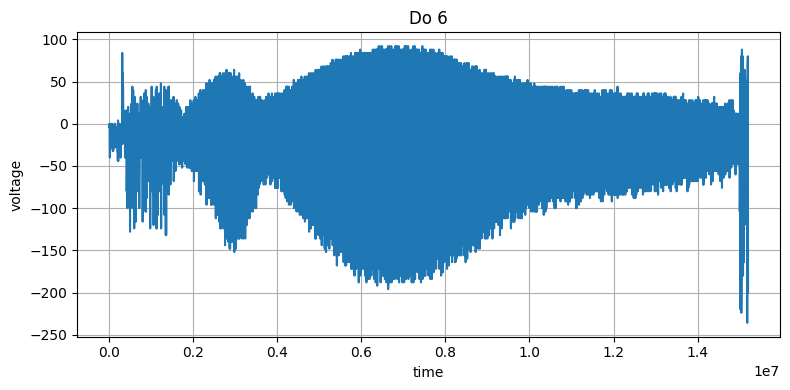

In [86]:
plot_df(data_do6, title="Do 6")

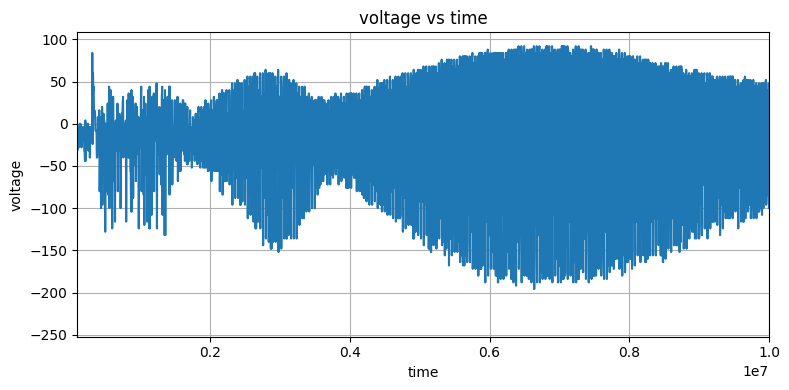

In [87]:
plot_df(data_do6, xlim = [0.1e6, 1e7])

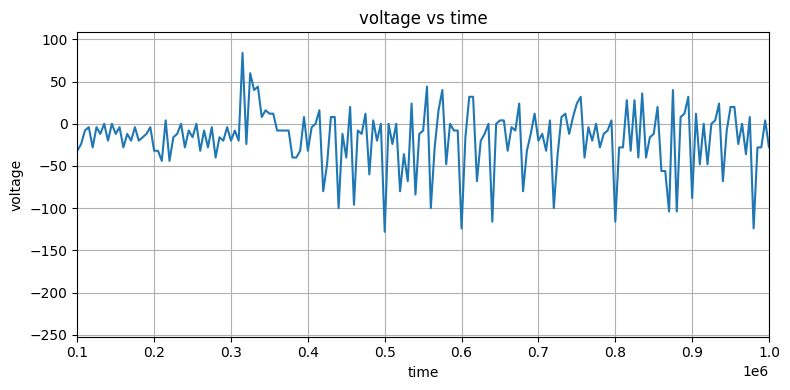

In [88]:
plot_df(data_do6, xlim = [0.1e6, 0.1e7])

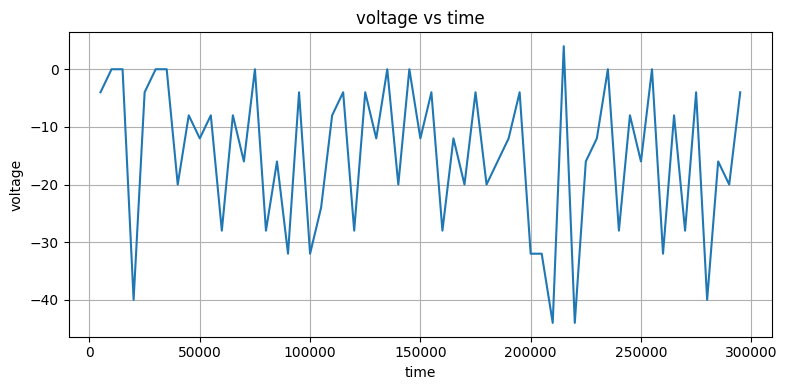

In [89]:
zero_do6 = data_do6[data_do6["time"]<0.3e6]
plot_df(zero_do6)

 Valor central original -14.779661237183264


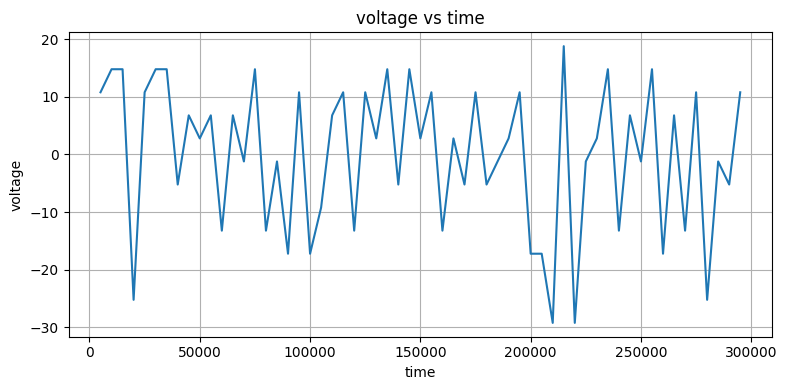

In [90]:
zero_do6f, dispDo6 = centering_voltage(zero_do6)
plot_df(zero_do6f)

In [91]:
zero_do6f["voltage"].mean()

np.float64(-3.9140065952886874e-16)

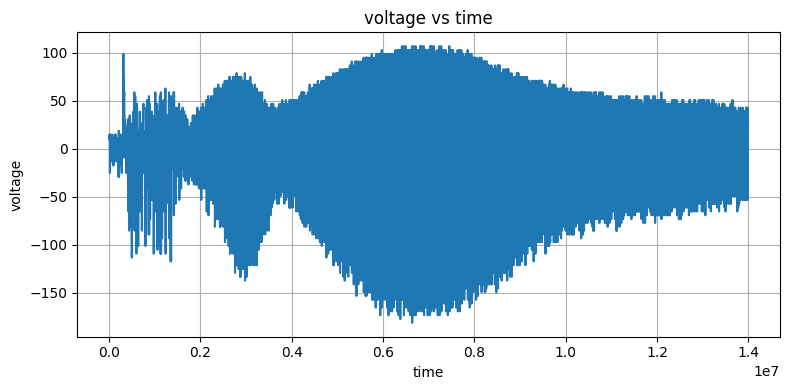

In [92]:
center_do6 = move_voltage(data_do6[data_do6["time"]<1.4e7],
                          displacement=dispDo6)
plot_df(center_do6)

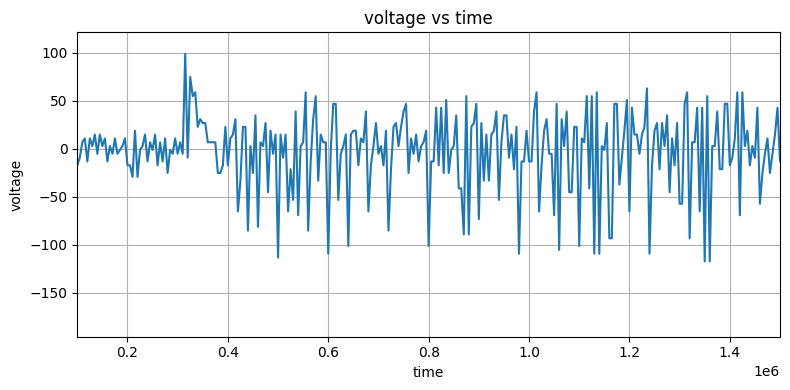

In [93]:
plot_df(center_do6, xlim=[0.1e6, 1.5e6])

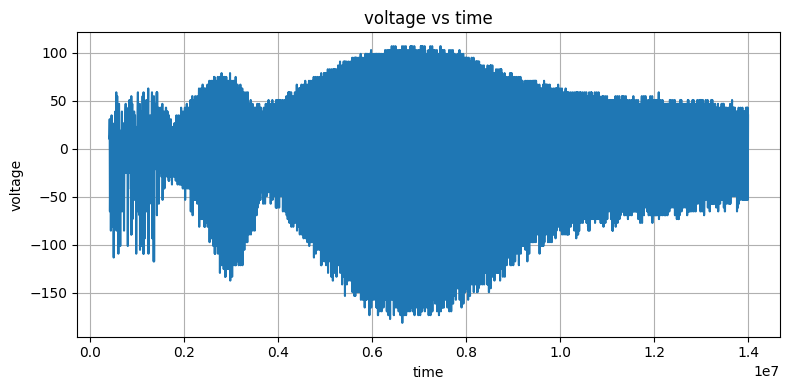

In [94]:
cl_do6 = center_do6[center_do6["time"]>0.4e6]
plot_df(cl_do6)

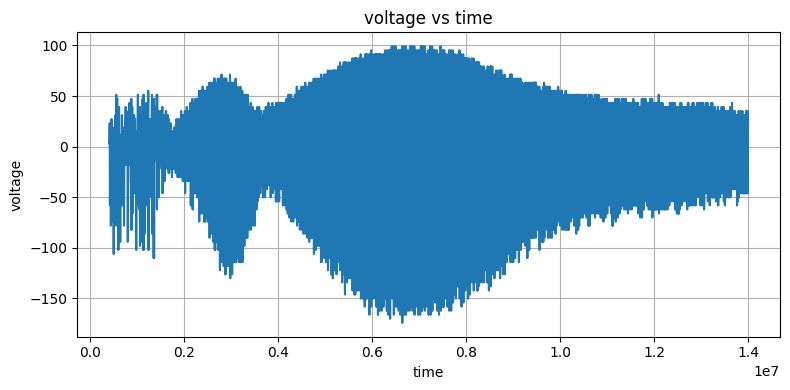

In [95]:
calibrate_do6 = sustraction_noise_pos_neg(cl_do6, dV_m, dV_p)

plot_df(calibrate_do6)

In [96]:
calibrate_do6 = calibrate_do6.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

In [97]:
calibrate_do6.head()

time_uS  Voltage_mV
index                      
81     405000.0    3.245945
82     410000.0    7.245945
83     415000.0   23.245945
84     420000.0  -58.100778
85     425000.0  -26.100777

In [98]:
calibrate_do6.to_csv("calibrate_do6.csv", index=False)

## LA

In [99]:
df_la1 = pd.read_excel("DatosInterferometria/la1.xlsx")
df_la2 = pd.read_excel("DatosInterferometria/la2.xlsx")
df_la3 = pd.read_excel("DatosInterferometria/la3.xlsx")
df_la4 = pd.read_excel("DatosInterferometria/la4.xlsx")
df_la5 = pd.read_excel("DatosInterferometria/la5.xlsx")

In [100]:
metala1, data_la1 = procesar_owon(df_la1)
metala2, data_la2 = procesar_owon(df_la2)
metala3, data_la3 = procesar_owon(df_la3)
metala4, data_la4 = procesar_owon(df_la4)
metala5, data_la5 = procesar_owon(df_la5)

## LA 1

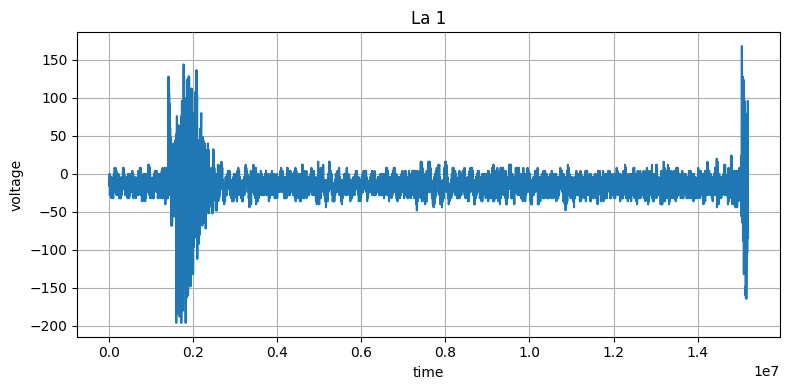

In [101]:
plot_df(data_la1, title="La 1")

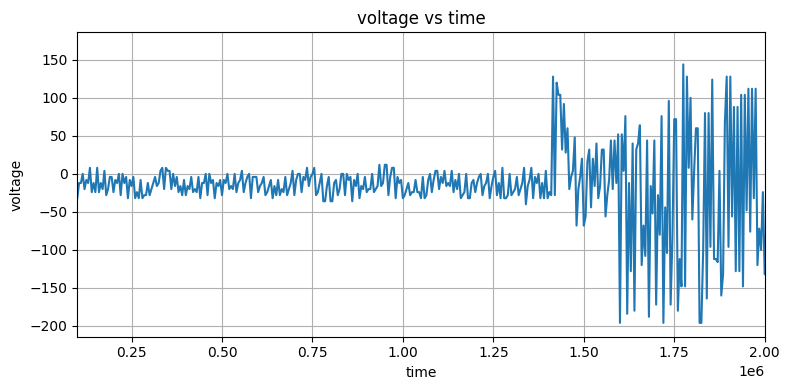

In [102]:
plot_df(data_la1, xlim = [0.1e6, 0.2e7])

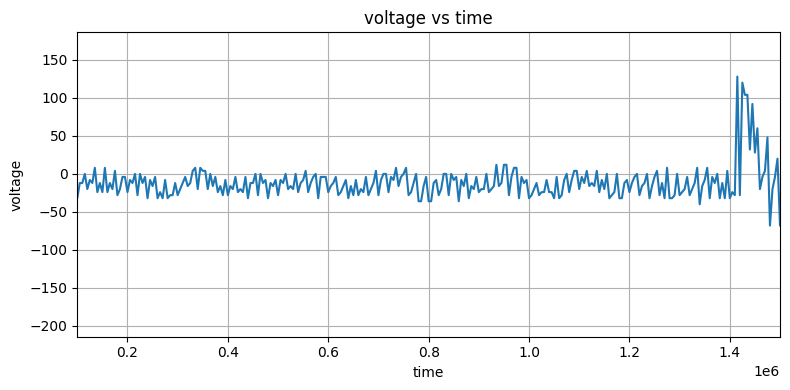

In [103]:
plot_df(data_la1, xlim = [0.1e6, 1.5e6])

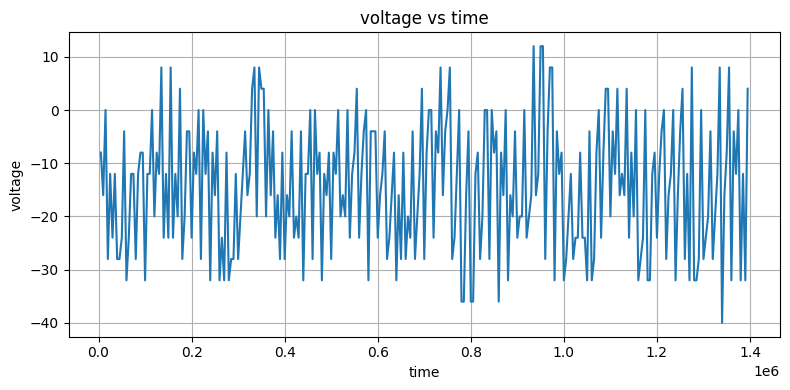

In [104]:
zero_la1 = data_la1[data_la1["time"]<1.4e6]
plot_df(zero_la1)

 Valor central original -14.26523318747893


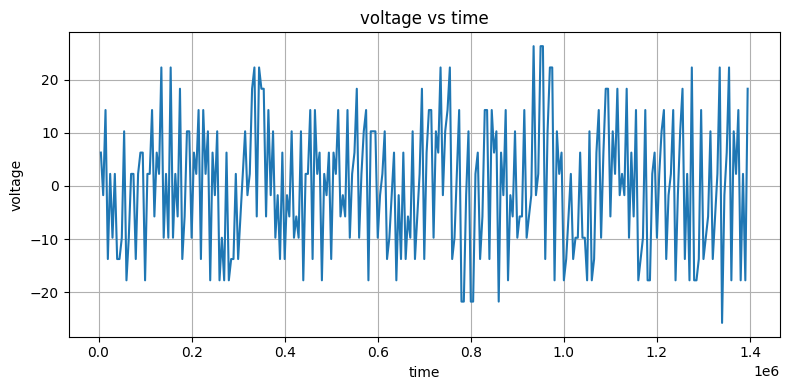

In [105]:
zero_la1f, dispLa1 = centering_voltage(zero_la1)
plot_df(zero_la1f)

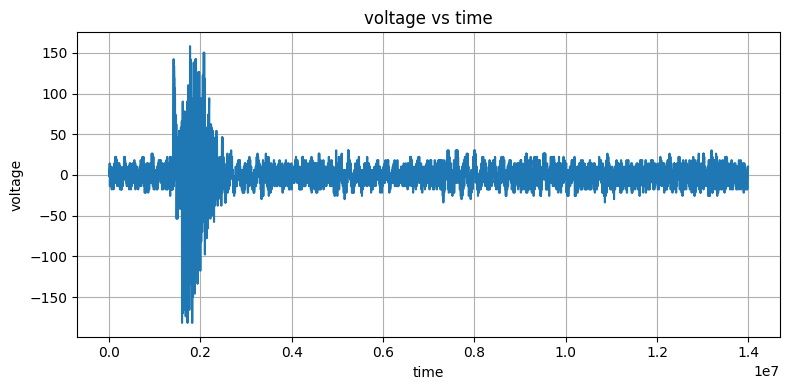

In [106]:
center_la1 = move_voltage(data_la1[data_la1["time"]<1.4e7],
                          displacement=dispLa1)
plot_df(center_la1)

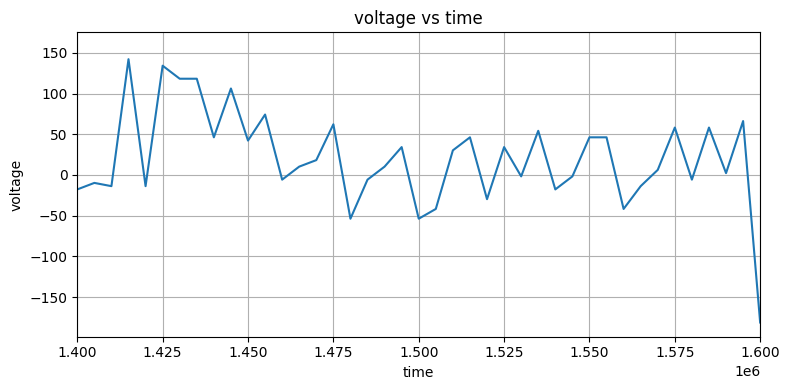

In [107]:
plot_df(center_la1, xlim=[1.4e6, 1.6e6])

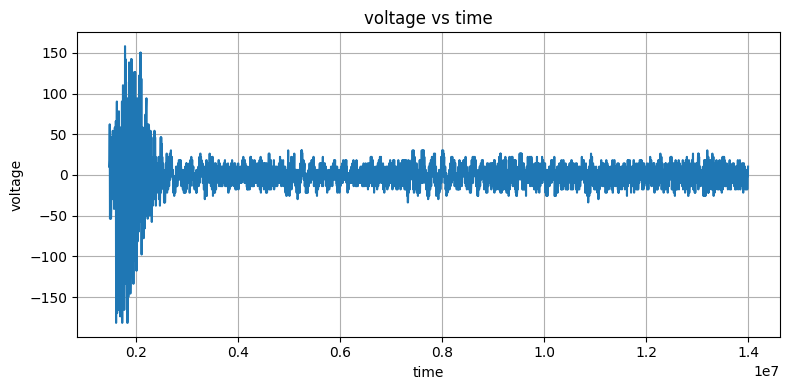

In [108]:
cl_la1 = center_la1[center_la1["time"]>1.46e6]
plot_df(cl_la1)

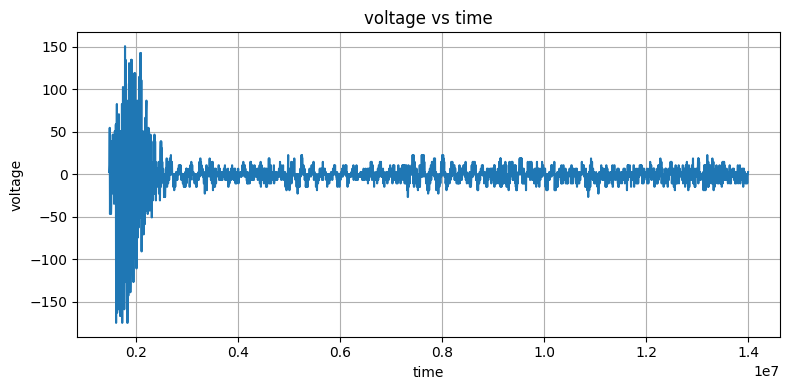

In [109]:
calibrate_la1 = sustraction_noise_pos_neg(cl_la1, dV_m, dV_p)
plot_df(calibrate_la1)

Sin embargo, parece que aún luego de hacer la resta del ruido inicial queda ruido en el detector que habría que restar, por lo que tomamos los valores desde 0.4e7 hasta 1.4e7, calculamos los promedios mayores que 0 y menores que 0, y hacemos nuevamente la resta.

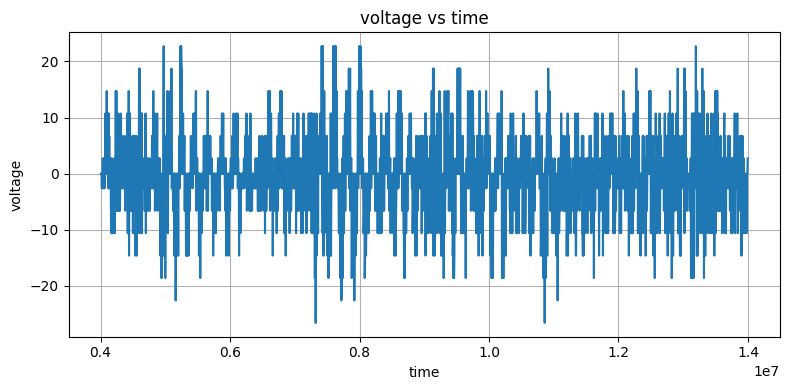

In [110]:
post_noise_la1 = calibrate_la1[calibrate_la1["time"]>0.4e7]
plot_df(post_noise_la1, "time")

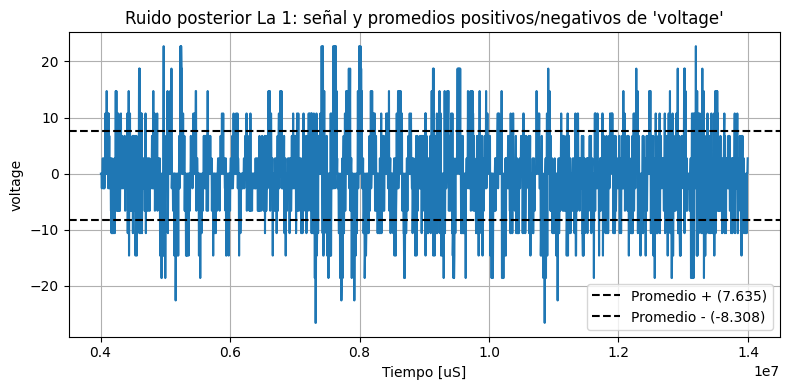

In [111]:
minr_la1, maxr_la1 = mean_pos_neg(post_noise_la1, "voltage",
                                  "Ruido posterior La 1")

In [112]:
print(minr_la1)

-8.30797609610552


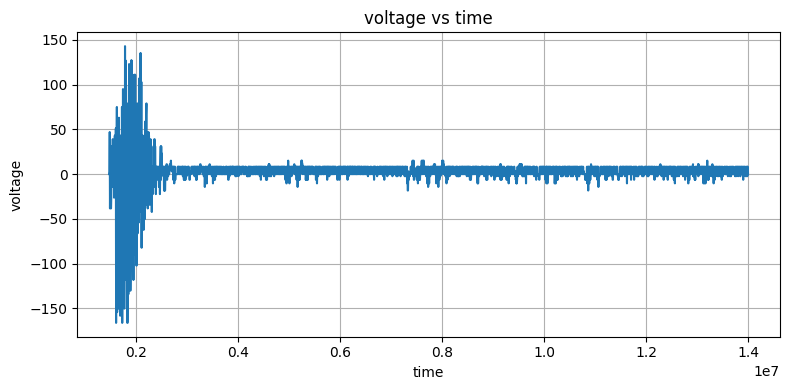

In [113]:
cal_post_la1 = sustraction_noise_pos_neg(calibrate_la1,
                                         minr_la1, maxr_la1)

plot_df(cal_post_la1)

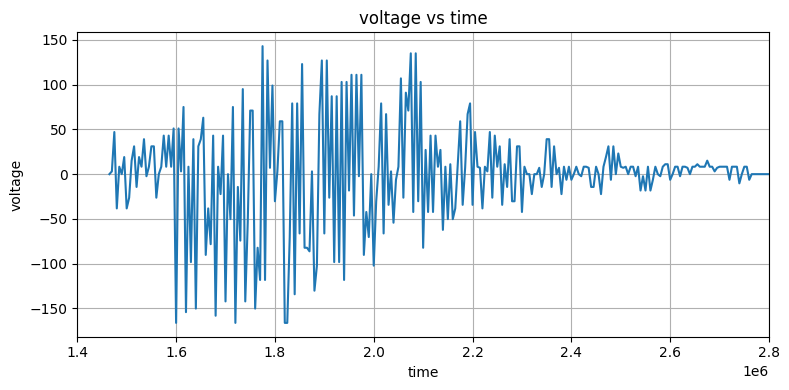

In [114]:
plot_df(cal_post_la1, xlim=[1.4e6, 2.8e6])

Con el gráfico anterior vemos que la onda parece existir solo hasta 2.6e6 hasta antes que sea consumida por el ruido.

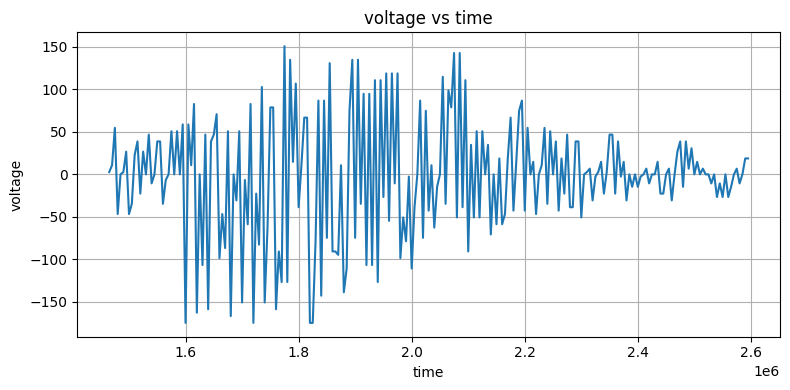

In [115]:
calibrate_la1_cut = calibrate_la1[calibrate_la1["time"]<2.6e6]
plot_df(calibrate_la1_cut)

In [116]:
print(f"max = {calibrate_la1_cut["voltage"].max()} min = {calibrate_la1_cut["voltage"].min()}")

max = 150.73151926610134 min = -174.615207489939


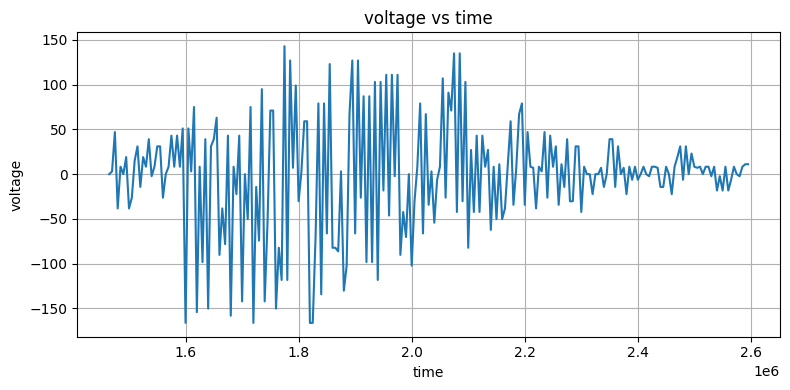

In [117]:
cal_post_la1_cut = cal_post_la1[cal_post_la1["time"]<2.6e6]
plot_df(cal_post_la1_cut)

In [118]:
print(f"max = {cal_post_la1_cut["voltage"].max()} min = {cal_post_la1_cut["voltage"].min()}")

max = 143.0967763258565 min = -166.3072313938335


In [119]:
calibrate_la1_cut = calibrate_la1_cut.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_la1_cut.to_csv("calibrate_data/la/calibrate_la1.csv",
                         index=False)

In [120]:
cal_post_la1_cut = cal_post_la1_cut.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

cal_post_la1_cut.to_csv("calibrate_data/la_sub/substracted_la1.csv", index=False)

## LA 2

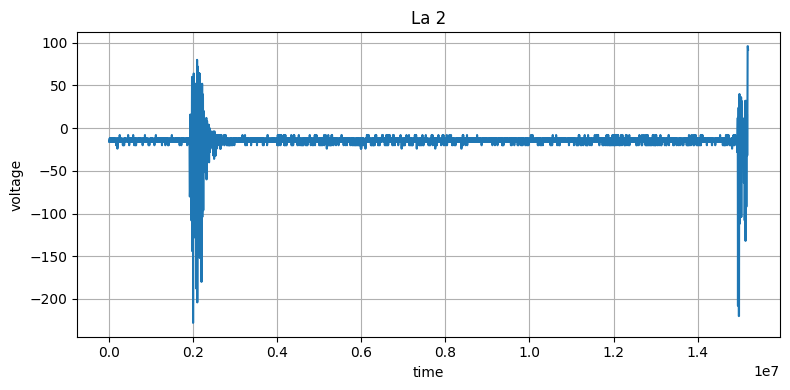

In [121]:
plot_df(data_la2, title="La 2")

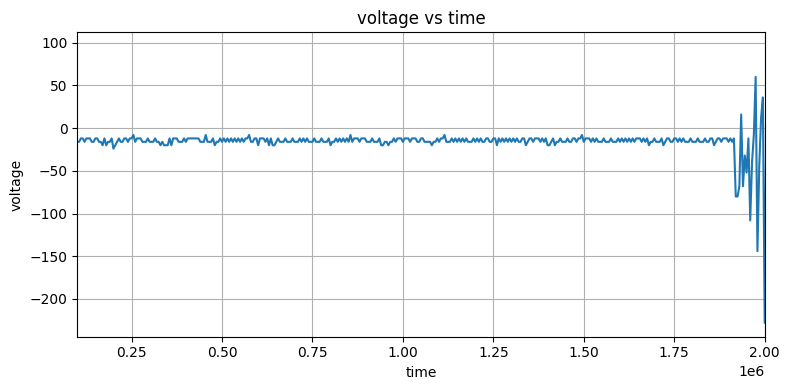

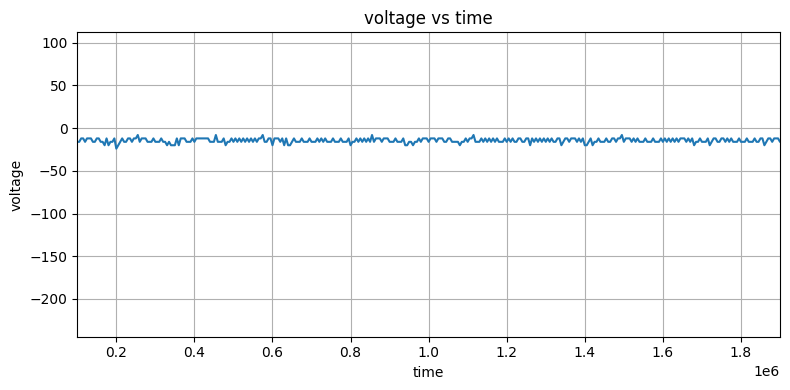

In [122]:
plot_df(data_la2, xlim = [0.1e6, 0.2e7])
plot_df(data_la2, xlim = [0.1e6, 1.90e6])

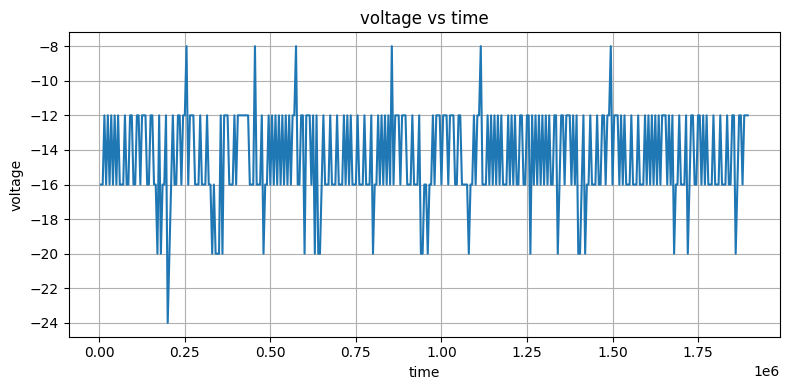

In [123]:
zero_la2 = data_la2[data_la2["time"]<1.9e6]
plot_df(zero_la2)

 Valor central original -14.469657207699123


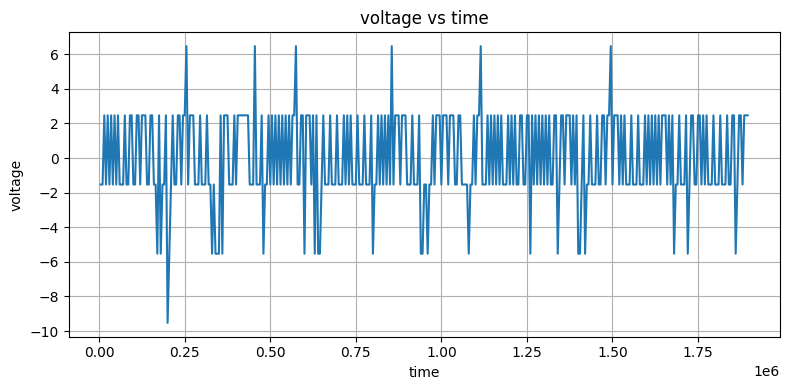

In [124]:
zero_la2f, dispLa2 = centering_voltage(zero_la2)
plot_df(zero_la2f)

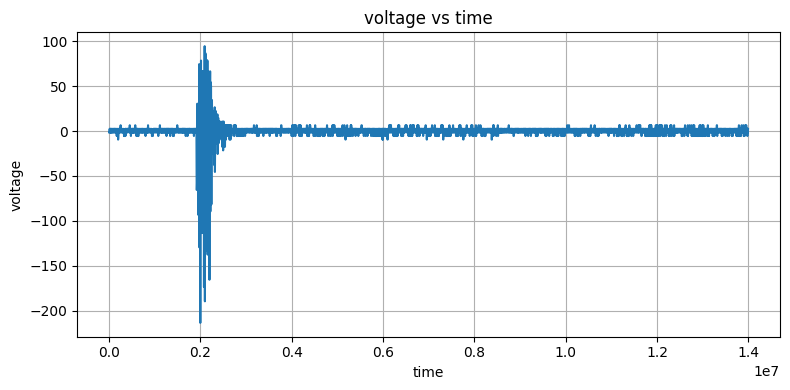

In [125]:
center_la2 = move_voltage(data_la2[data_la2["time"]<1.4e7],
                          displacement=dispLa2)
plot_df(center_la2)

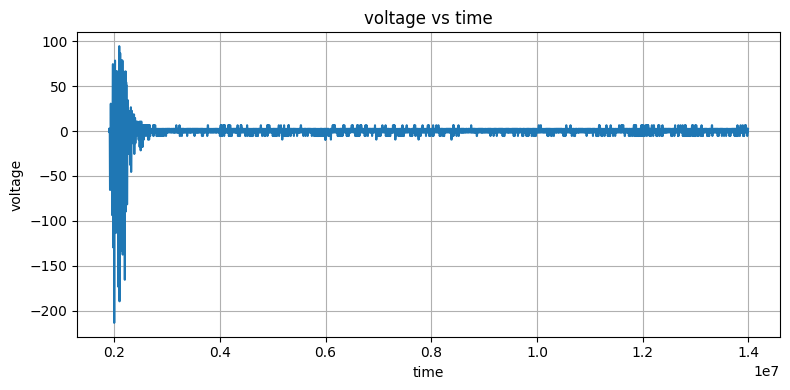

In [126]:
cl_la2 = center_la2[center_la2["time"]>1.9e6]
plot_df(cl_la2)

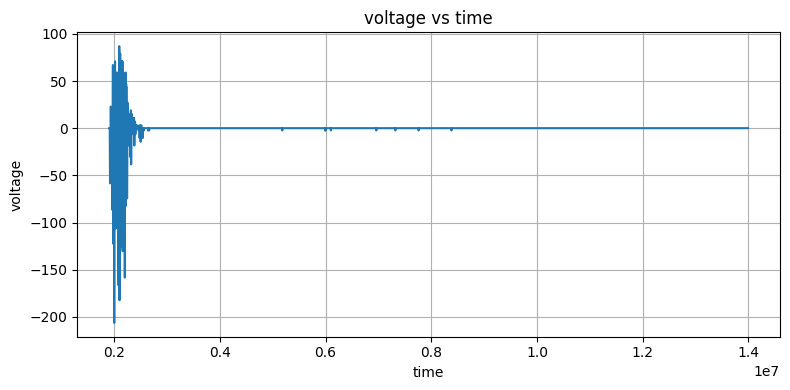

In [127]:
calibrate_la2 = sustraction_noise_pos_neg(cl_la2, dV_m, dV_p)
plot_df(calibrate_la2)

En este caso, el ruido final ya era menor al ruido base calculado de forma inicial, por lo que pasamos a cortarlo para guardarlo directamente en la carpeta substracted.

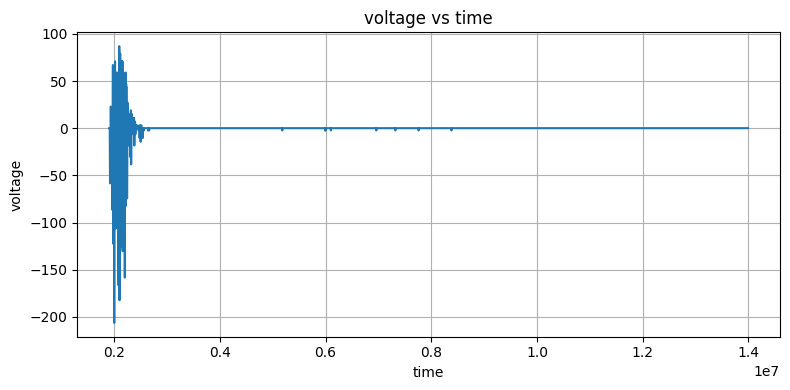

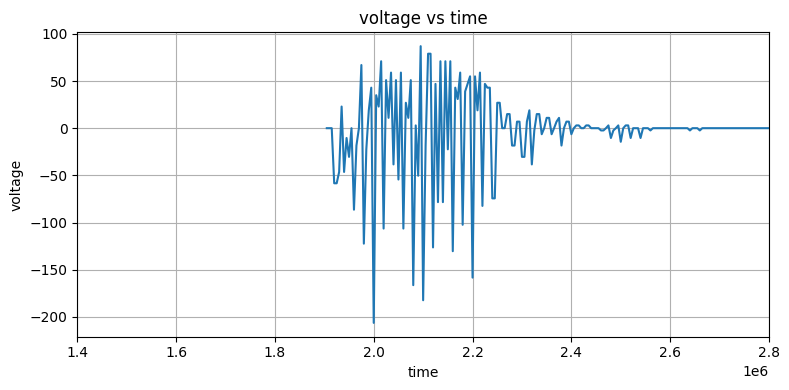

In [128]:
plot_df(calibrate_la2)
plot_df(calibrate_la2, xlim=[1.4e6, 2.8e6])

Se hace el corte en 2.6e6, que cuadra con el anterior

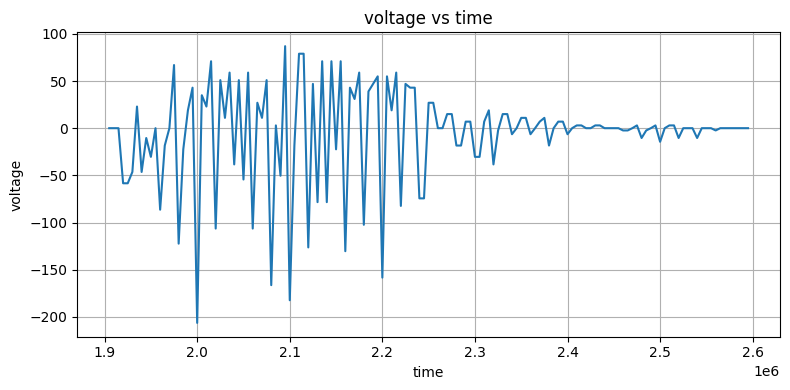

In [129]:
calibrate_la2_cut = calibrate_la2[calibrate_la2["time"]<2.6e6]
plot_df(calibrate_la2_cut)

In [130]:
calibrate_la2_cut = calibrate_la2.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_la2.to_csv("calibrate_data/la_sub/calibrate_la2.csv",
                         index=False)

## LA 3

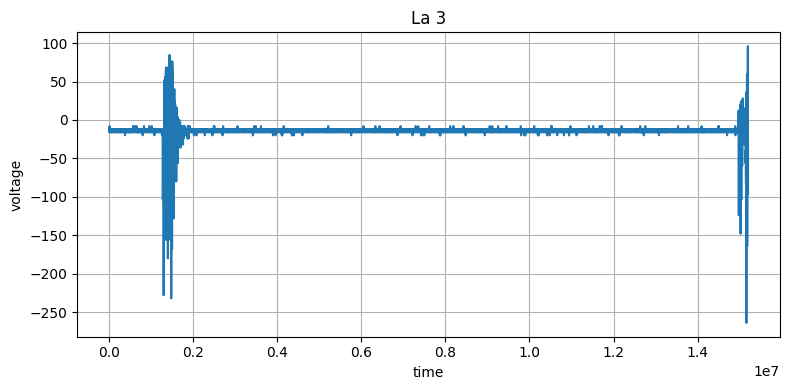

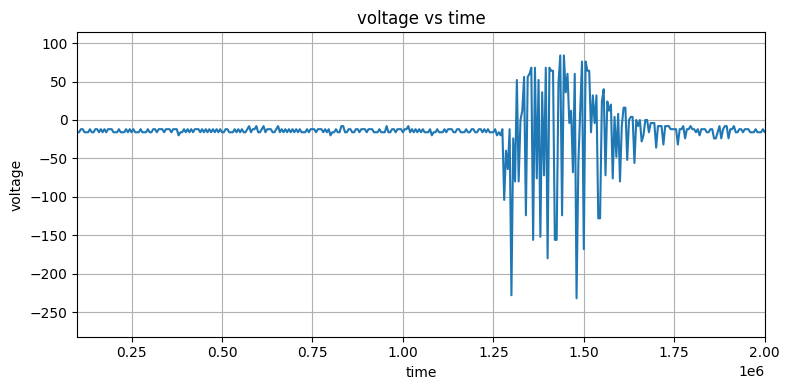

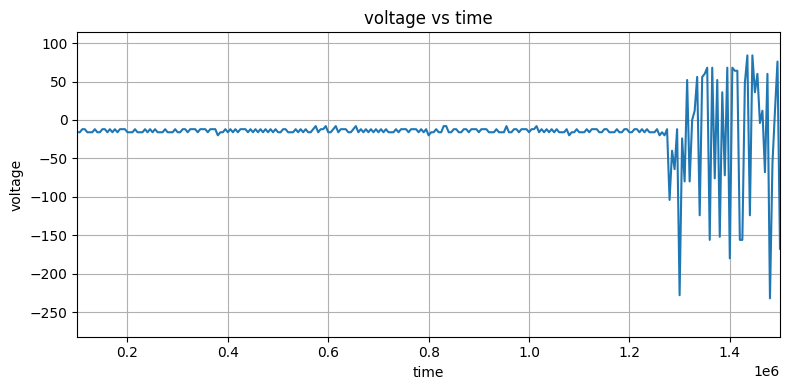

In [131]:
plot_df(data_la3, title="La 3")
plot_df(data_la3, xlim = [0.1e6, 0.2e7])
plot_df(data_la3, xlim = [0.1e6, 1.5e6])

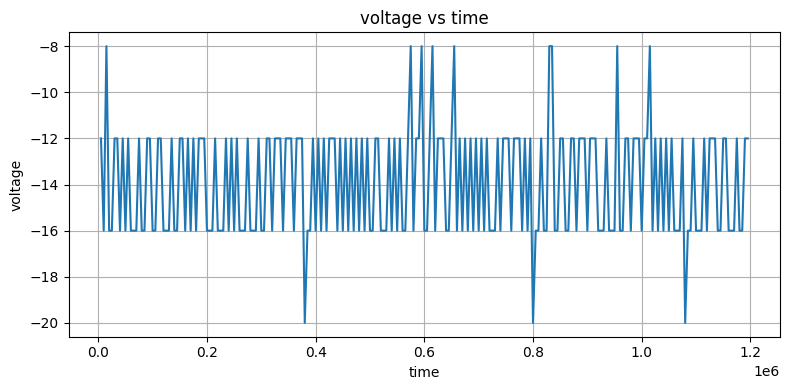

In [132]:
zero_la3 = data_la3[data_la3["time"]<1.2e6]
plot_df(zero_la3)

 Valor central original -13.924686399962614


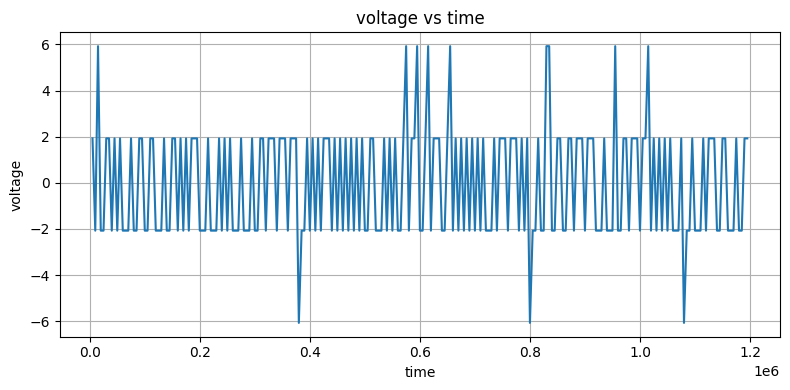

In [133]:
zero_la3f, dispLa3 = centering_voltage(zero_la3)
plot_df(zero_la3f)

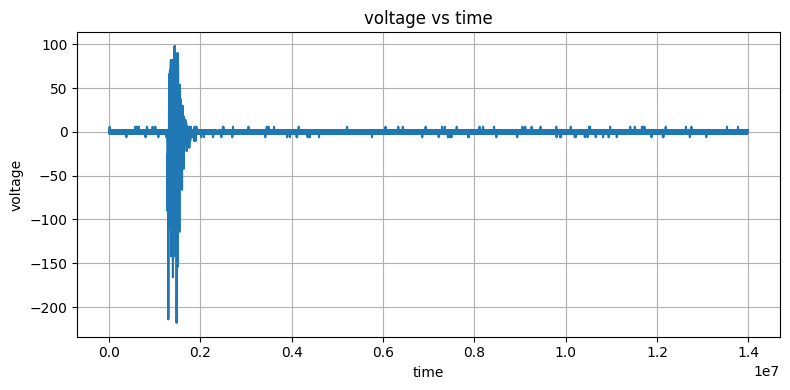

In [134]:
center_la3 = move_voltage(data_la3[data_la3["time"]<1.4e7],
                          displacement=dispLa3)
plot_df(center_la3)

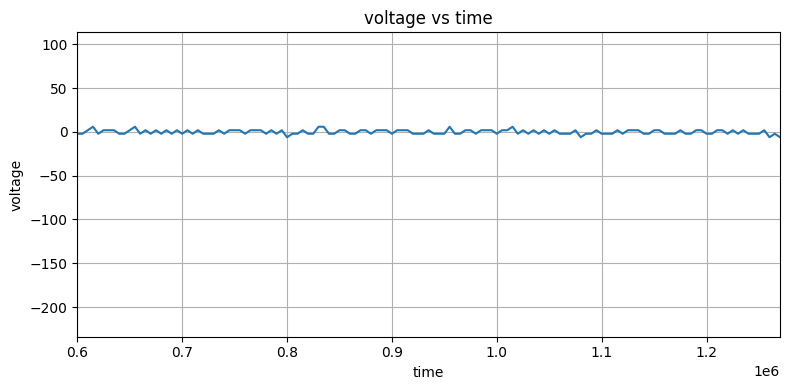

In [135]:
plot_df(center_la3, xlim=[0.6e6, 1.27e6])

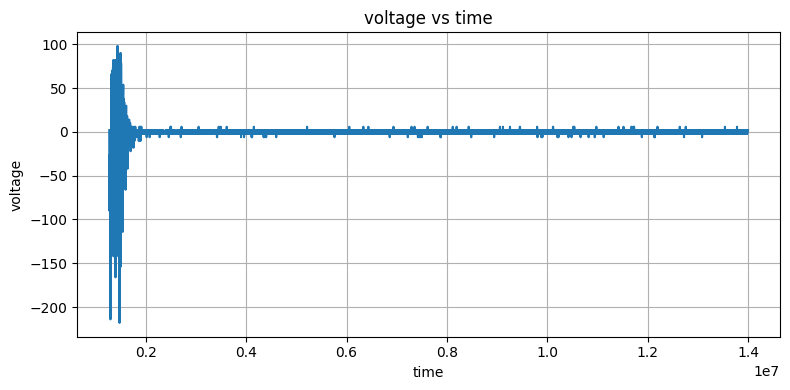

In [136]:
cl_la3 = center_la3[center_la3["time"]>1.27e6]
plot_df(cl_la3)

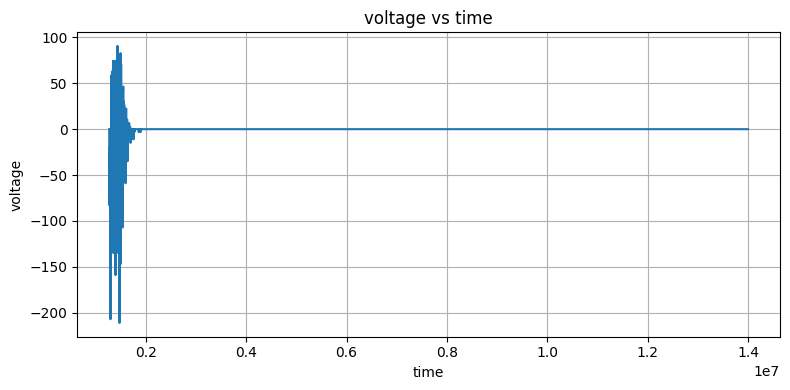

In [137]:
calibrate_la3 = sustraction_noise_pos_neg(cl_la3, dV_m, dV_p)
plot_df(calibrate_la3)

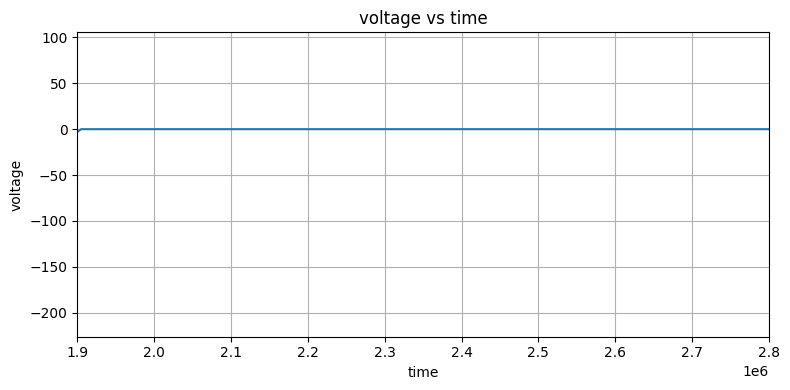

In [138]:
plot_df(calibrate_la3, xlim=[1.9e6, 2.8e6])

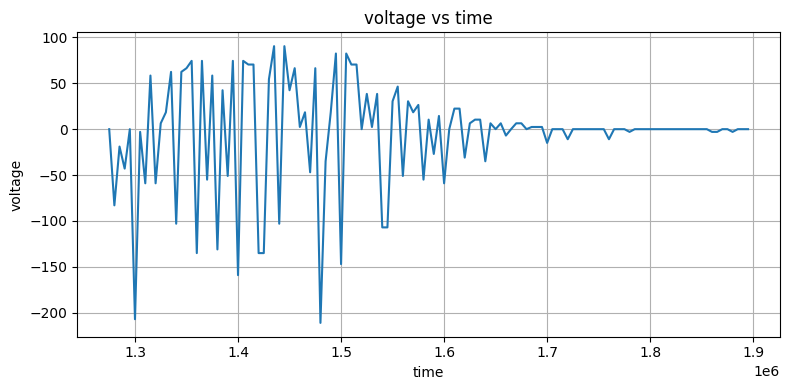

In [139]:
calibrate_la3_cut = calibrate_la3[calibrate_la3["time"]<1.9e6]
plot_df(calibrate_la3_cut)

In [140]:
calibrate_la3_cut = calibrate_la3_cut.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_la3.to_csv("calibrate_data/la_sub/calibrate_la3.csv",
                         index=False)

## LA 4

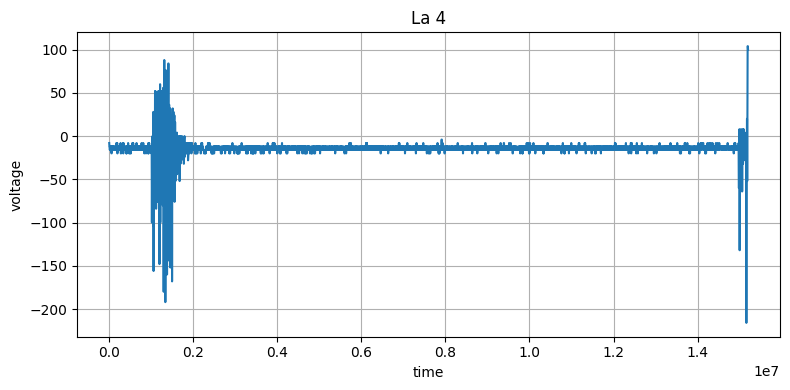

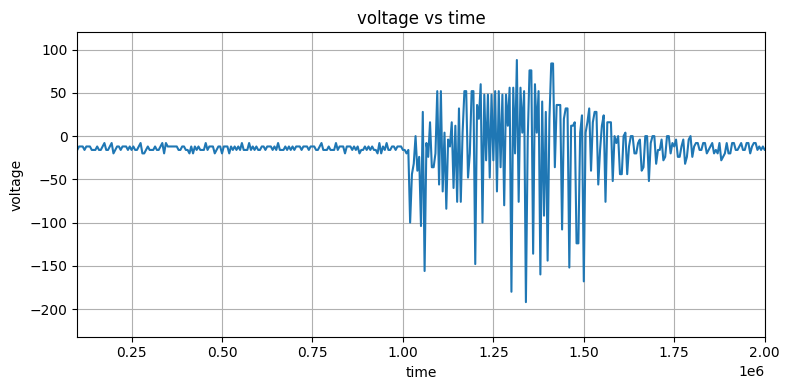

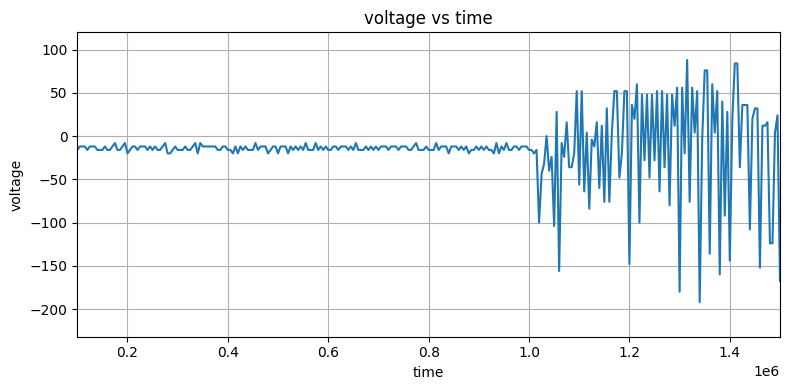

In [141]:
plot_df(data_la4, title="La 4")
plot_df(data_la4, xlim = [0.1e6, 0.2e7])
plot_df(data_la4, xlim = [0.1e6, 1.5e6])

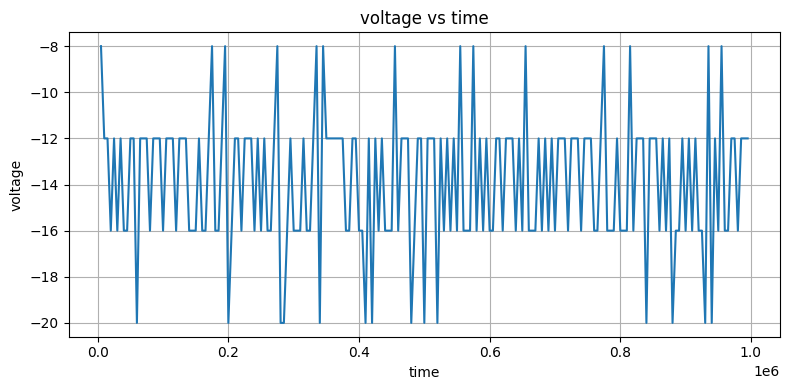

In [142]:
zero_la4 = data_la4[data_la4["time"]<1.0e6]
plot_df(zero_la4)

 Valor central original -13.849246437525629


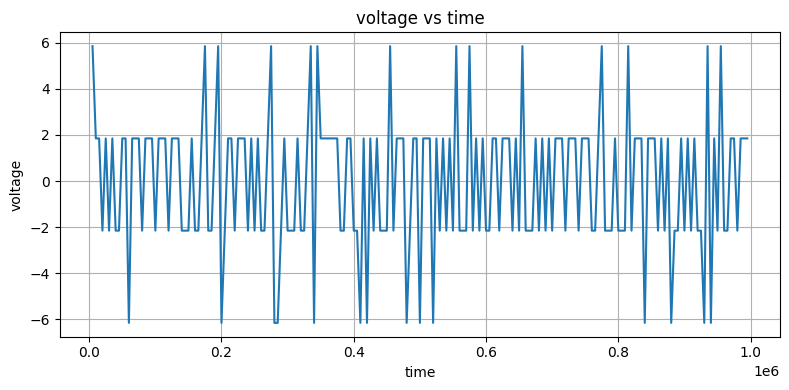

In [143]:
zero_la4f, dispLa4 = centering_voltage(zero_la4)
plot_df(zero_la4f)

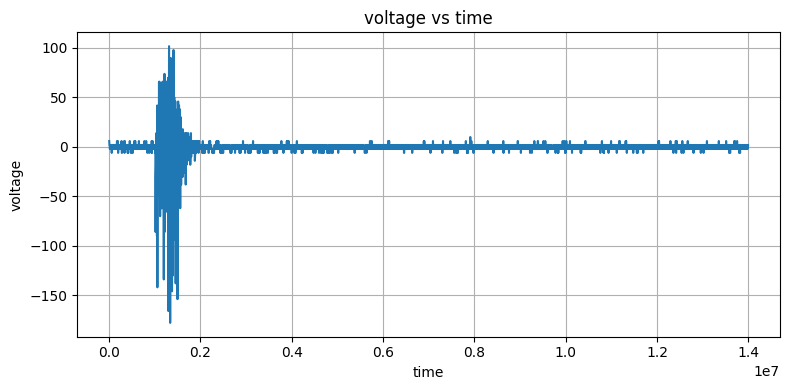

In [144]:
center_la4 = move_voltage(data_la4[data_la4["time"]<1.4e7],
                          displacement=dispLa4)
plot_df(center_la4)

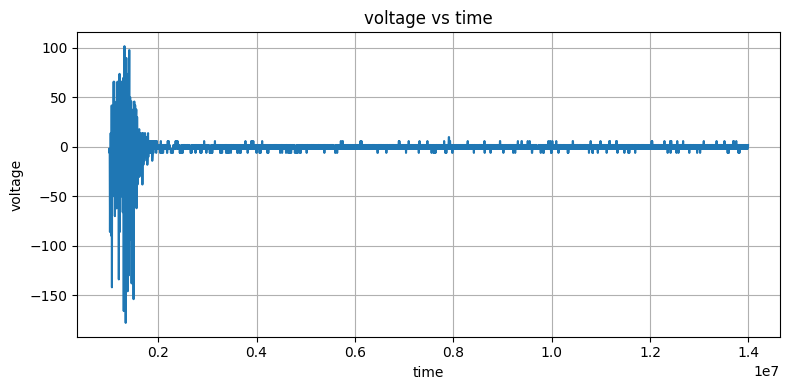

In [145]:
cl_la4 = center_la4[center_la4["time"]>1.0e6]
plot_df(cl_la4)

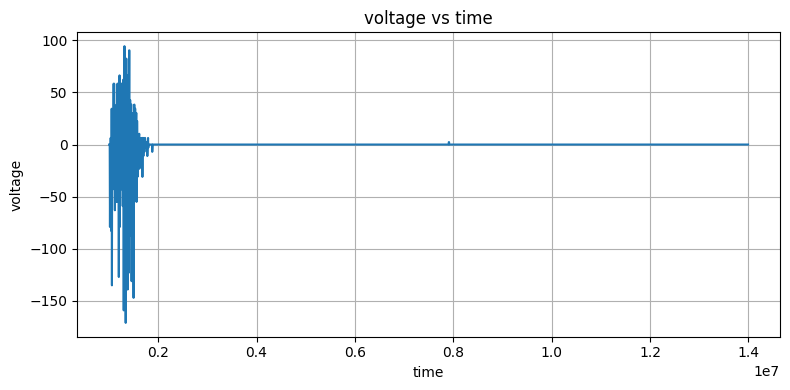

In [146]:
calibrate_la4 = sustraction_noise_pos_neg(cl_la4, dV_m, dV_p)
plot_df(calibrate_la4)

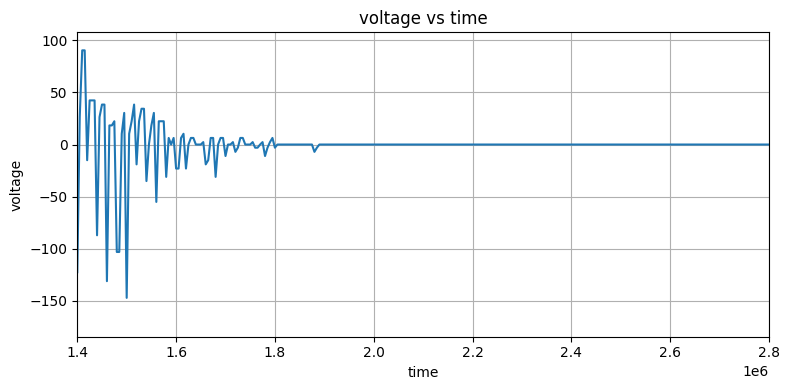

In [147]:
plot_df(calibrate_la4, xlim=[1.4e6, 2.8e6])

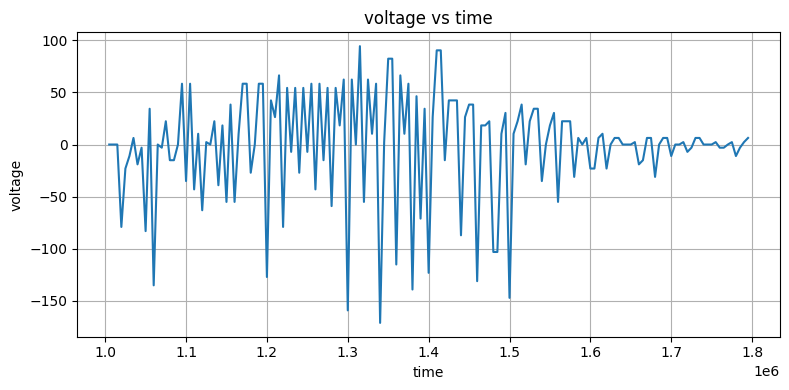

In [148]:
calibrate_la4_cut = calibrate_la4[calibrate_la4["time"]<1.8e6]
plot_df(calibrate_la4_cut)

In [149]:
calibrate_la4_cut = calibrate_la4_cut.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_la4.to_csv("calibrate_data/la_sub/calibrate_la4.csv",
                         index=False)

## LA 5

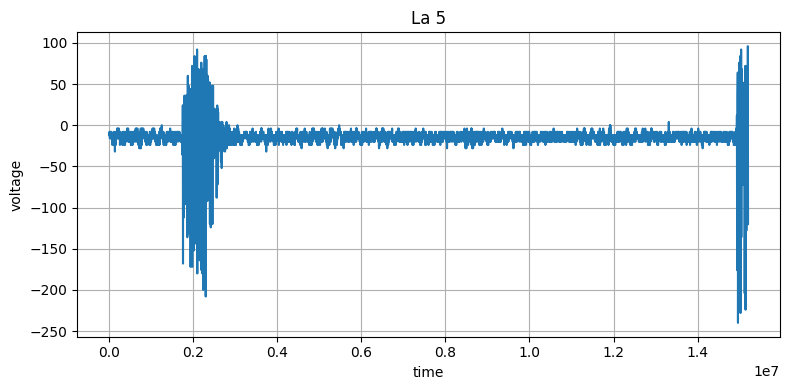

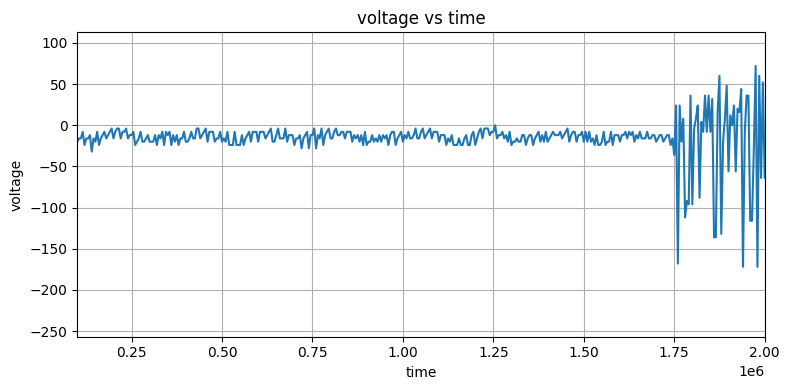

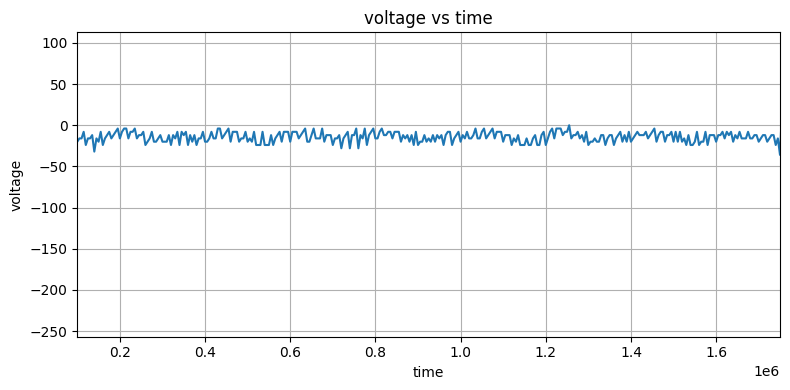

In [150]:
plot_df(data_la5, title="La 5")
plot_df(data_la5, xlim = [0.1e6, 0.2e7])
plot_df(data_la5, xlim = [0.1e6, 1.75e6])

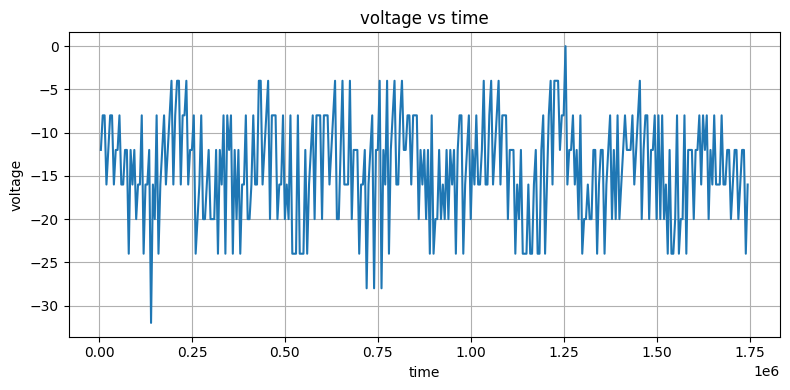

In [151]:
zero_la5 = data_la5[data_la5["time"]<1.75e6]
plot_df(zero_la5)

 Valor central original -14.120344049951067


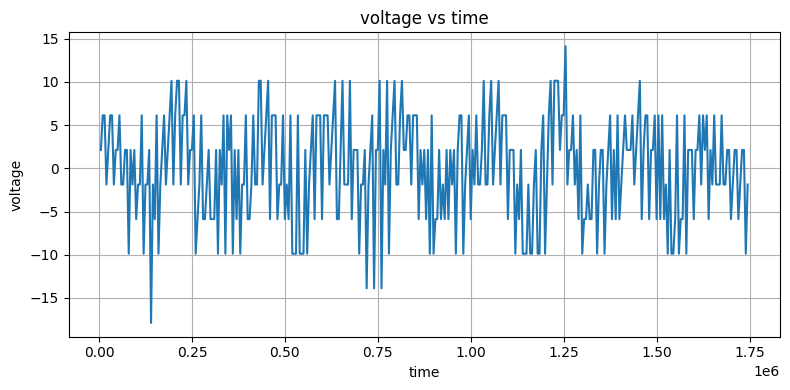

In [152]:
zero_la5f, dispLa5 = centering_voltage(zero_la5)
plot_df(zero_la5f)

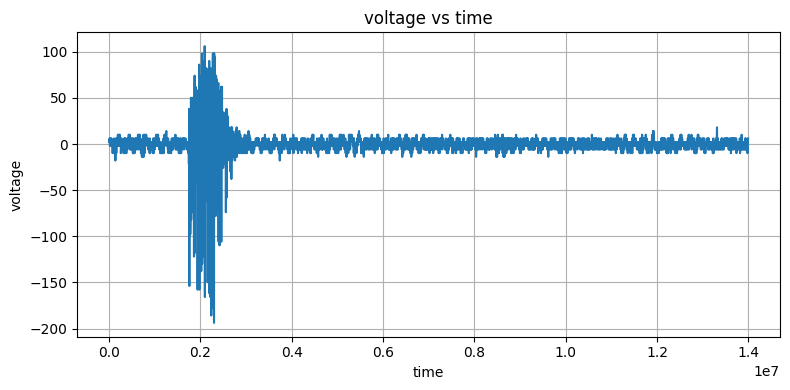

In [153]:
center_la5 = move_voltage(data_la5[data_la5["time"]<1.4e7],
                          displacement=dispLa5)

plot_df(center_la5)

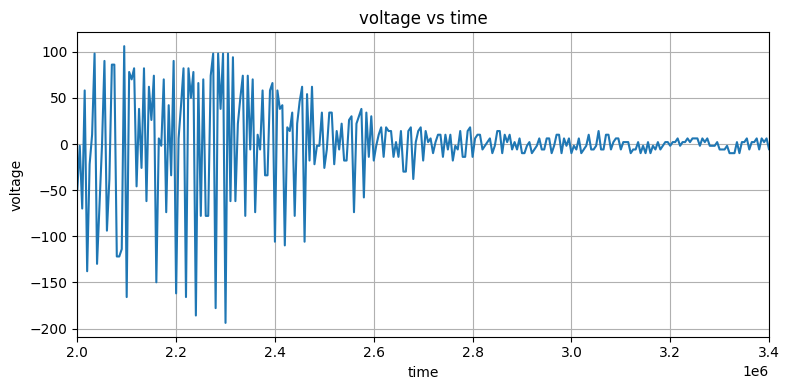

In [154]:
plot_df(center_la5, xlim=[0.2e7, 3.4e6])

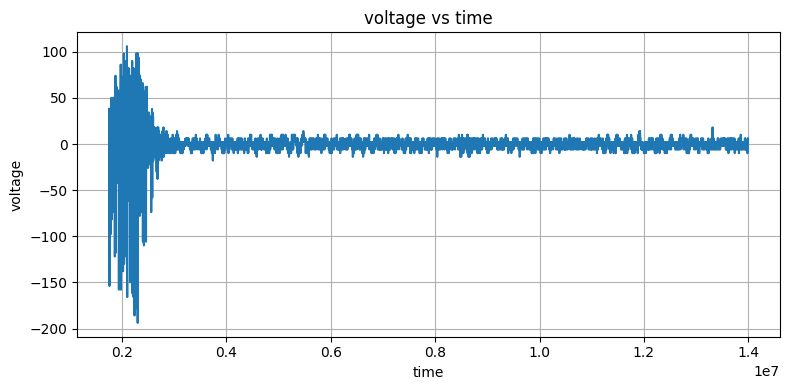

In [155]:
cl_la5 = center_la5[center_la5["time"]>1.75e6]
plot_df(cl_la5)

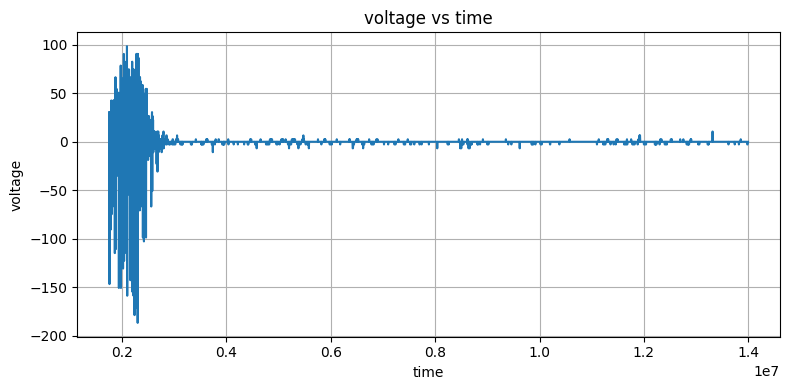

In [156]:
calibrate_la5 = sustraction_noise_pos_neg(cl_la5, dV_m, dV_p)
plot_df(calibrate_la5)

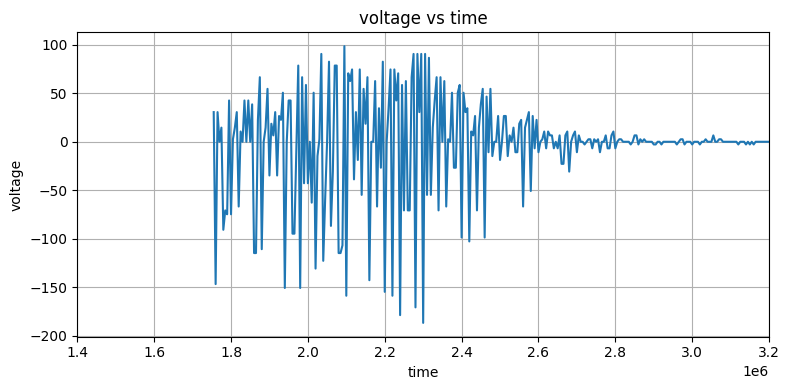

In [157]:
plot_df(calibrate_la5, xlim=[1.4e6, 3.2e6])

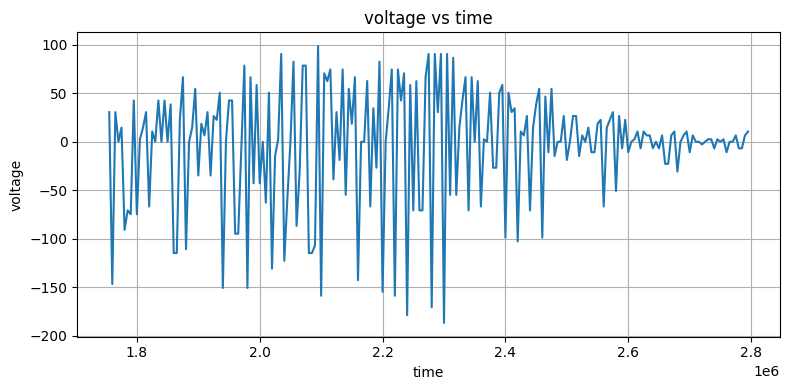

In [158]:
calibrate_la5_cut = calibrate_la5[calibrate_la5["time"]<2.8e6]
plot_df(calibrate_la5_cut)

In [159]:
calibrate_la5_cut = calibrate_la5_cut.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_la5.to_csv("calibrate_data/la_sub/calibrate_la5.csv",
                         index=False)

Muestra de datos importantes del encabezado

In [160]:
# Picos máximos hacen uso de el metadato 'PK-PK'

print(metado1['PK-PK'], metado1['SP'])
print(metado2['PK-PK'], metado2['SP'])
print(metado3['PK-PK'], metado3['SP'])
print(metado4['PK-PK'], metado4['SP'])
print(metado5['PK-PK'], metado5['SP'])
print(metado6['PK-PK'], metado6['SP'])

468.000 mV 5000.000 uS
352.000 mV 5000.000 uS
392.000 mV 5000.000 uS
280.000 mV 5000.000 uS
352.000 mV 5000.000 uS
328.000 mV 5000.000 uS


In [161]:
print(metala1['PK-PK'], metala1['SP'])
print(metala2['PK-PK'])
print(metala3['PK-PK'])
print(metala4['PK-PK'])
print(metala5['PK-PK'])

364.000 mV 5000.000 uS
324.000 mV
360.000 mV
320.000 mV
336.000 mV


Vemso que todas tienen un sample period similar, sin embargo, en las señales senozoidales este varía e incluso puede ser la única relación que hay con el valor del tiempo pues este está dado solo por el índice y hay que multiplicarlo por este metadato.

## Señales Senozoidales

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [163]:
df_sin1 = pd.read_excel("DatosInterferometria/sen1.xlsx")
df_sin01 = pd.read_excel("DatosInterferometria/sen01.xlsx")
df_sin2 = pd.read_excel("DatosInterferometria/sen2.xlsx")
df_sin05 = pd.read_excel("DatosInterferometria/sen05.xlsx")
df_sin10 = pd.read_excel("DatosInterferometria/sen10.xlsx")

Cada onda fue enviada de forma senozoidal a un voltaje que va desde 5 a -5 V, y con un periodo correspondiente para cada uno de 1s, 0.1s, 2s, 0.5s, 10s.

In [164]:
df_sin1.head(10)

Unnamed: 0          CH1
0  Frequency:            ?
1     Period:            ?
2         SP:  1000.000 uS
3      PK-PK:   392.000 mV
4  Units:(mV)          NaN
5           1   -48.000001
6           2         24.0
7           3         12.0
8           4          8.0
9           5          8.0

In [165]:
df_sin01.head(10)

Unnamed: 0          CH1
0  Frequency:            ?
1     Period:            ?
2         SP:  1000.000 uS
3      PK-PK:   404.000 mV
4  Units:(mV)          NaN
5           1   -44.000001
6           2  -128.000002
7           3  -108.000002
8           4   -80.000001
9           5   -48.000001

In [166]:
df_sin05.head(10)

Unnamed: 0          CH1
0  Frequency:            ?
1     Period:            ?
2         SP:  1000.000 uS
3      PK-PK:   448.000 mV
4  Units:(mV)          NaN
5           1         -8.0
6           2         -4.0
7           3            0
8           4          4.0
9           5          4.0

Vemos que para los valores de periodo menor a 2, las medidas de toman cada 1000 microsegundos, por lo que al tener solo la columna de índices, es necesario crear la columna "time" multiplicando el índice por el SP.

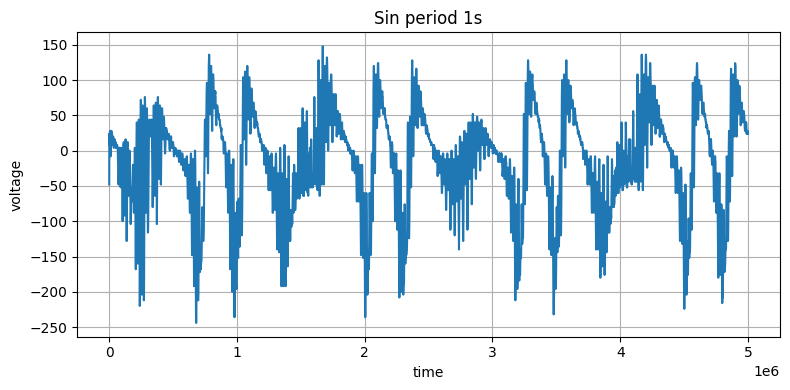

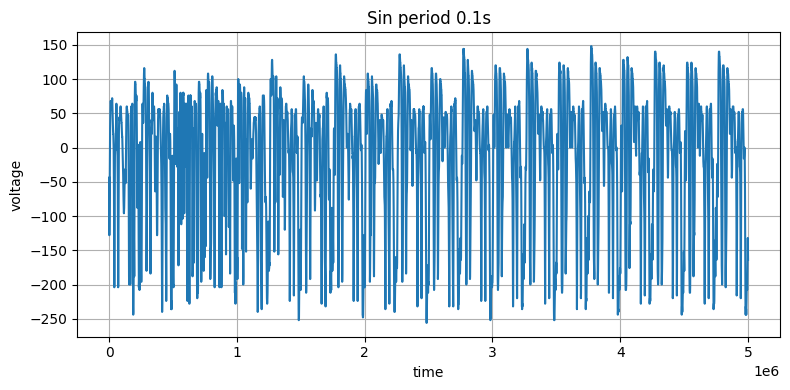

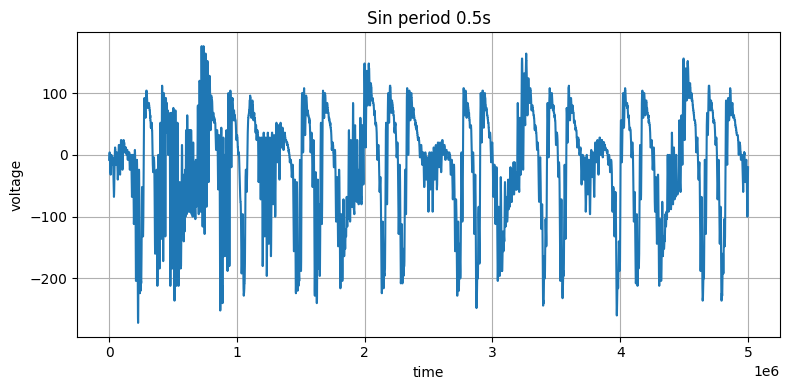

In [167]:
from utils.organize_sintime import preparar_df_owon

SP = 1000 # uS

data_sin1 = preparar_df_owon(df_sin1, "Unnamed: 0", SP)
plot_df(data_sin1, title="Sin period 1s")

data_sin01 = preparar_df_owon(df_sin01, "Unnamed: 0", SP)
plot_df(data_sin01, title="Sin period 0.1s")

data_sin05 = preparar_df_owon(df_sin05, "Unnamed: 0", SP)
plot_df(data_sin05, title="Sin period 0.5s")

Vemos que los registros no contienen contaminación inicial ni final por ruido que deba ser cortada, no da cuenta de la afectación por el botón, por lo que solo es necesario centrarlos y luego aplicar la corrección por ruido.

 Valor central original -14.268000212609769


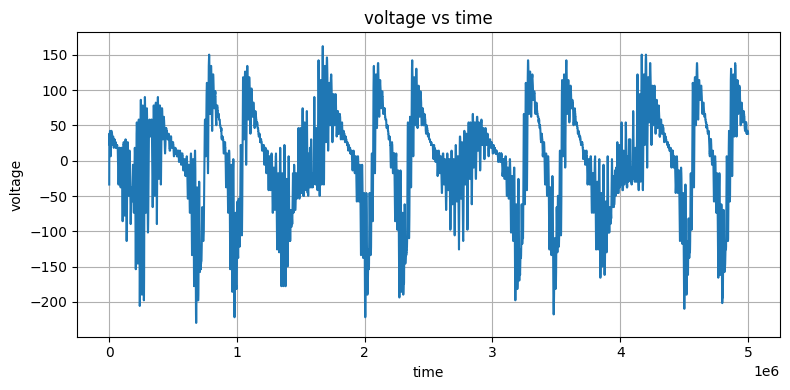

In [168]:
center_sin1, dispSin1 = centering_voltage(data_sin1)
plot_df(center_sin1)

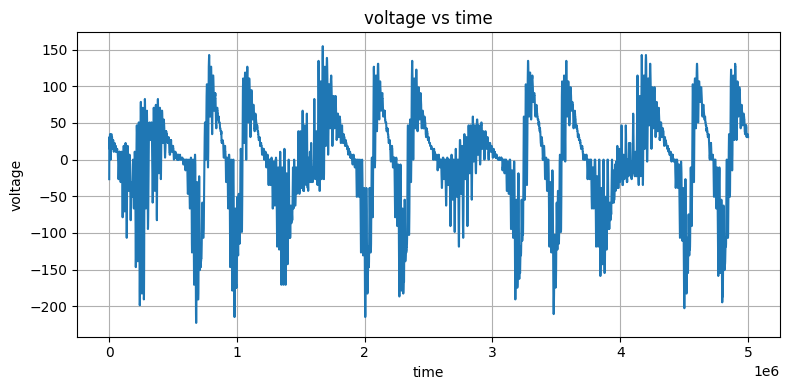

In [169]:
calibrate_sin1 = sustraction_noise_pos_neg(center_sin1, dV_m, dV_p)
plot_df(calibrate_sin1)

 Valor central original -14.835200221061706


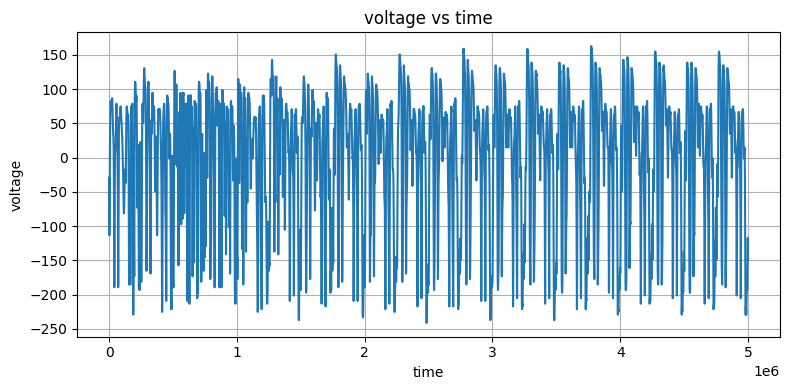

In [170]:
center_sin01, dispSin01 = centering_voltage(data_sin01)
plot_df(center_sin01)

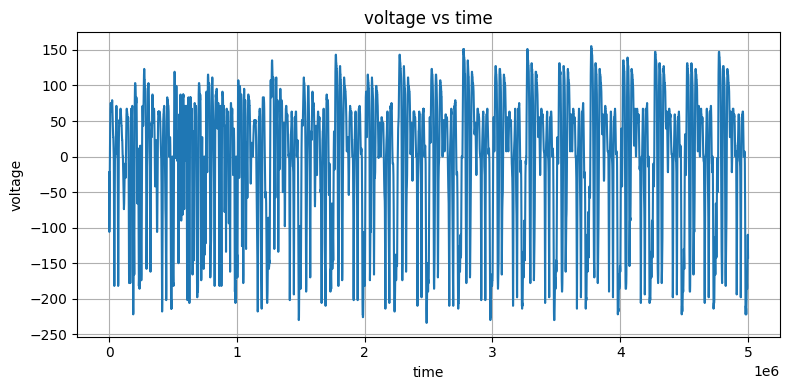

In [171]:
calibrate_sin01 = sustraction_noise_pos_neg(center_sin01, dV_m, dV_p)
plot_df(calibrate_sin01)

 Valor central original -14.875200221657753


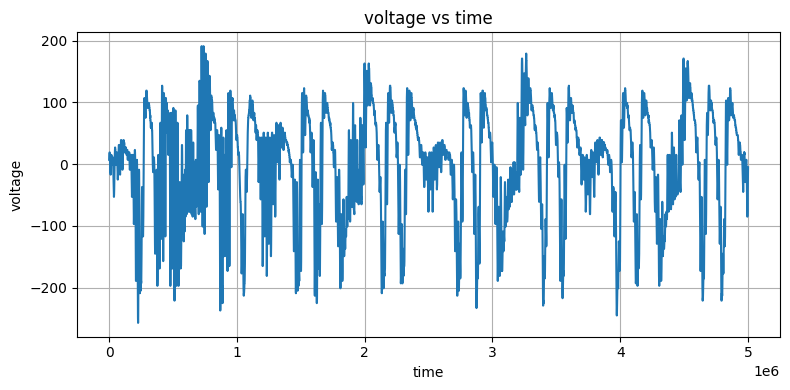

In [172]:
center_sin05, dispSin05 = centering_voltage(data_sin05)
plot_df(center_sin05)

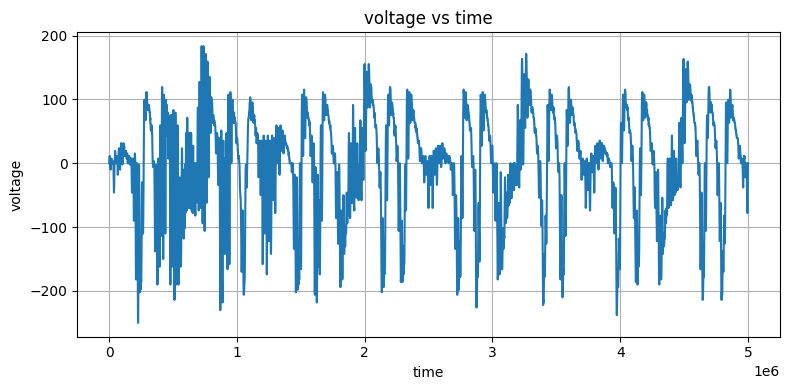

In [173]:
calibrate_sin05 = sustraction_noise_pos_neg(center_sin05, dV_m, dV_p)
plot_df(calibrate_sin05)

In [174]:
calibrate_sin1 = calibrate_sin1.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_sin1.to_csv("calibrate_data/sin/calibrate_sin1.csv", index=False)

In [175]:
calibrate_sin01 = calibrate_sin01.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_sin01.to_csv("calibrate_data/sin/calibrate_sin01.csv", index=False)

In [176]:
calibrate_sin05 = calibrate_sin05.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_sin05.to_csv("calibrate_data/sin/calibrate_sin05.csv", index=False)

In [177]:
df_sin2.head(10)

Unnamed: 0  Unnamed: 1          CH1
0  Frequency:         NaN    23.649 Hz
1     Period:         NaN    42.286 mS
2         SP:         NaN  1000.000 uS
3      PK-PK:         NaN   384.000 mV
4  Units:(mV)         NaN          NaN
5           1  1000.000us        -28.0
6           2  2000.000us   -64.000001
7           3  3000.000us         -4.0
8           4  4000.000us  -140.000002
9           5  5000.000us         -4.0

In [178]:
df_sin10.head(10)

Unnamed: 0   Unnamed: 1          CH1
0  Frequency:          NaN     2.752 Hz
1     Period:          NaN   363.429 mS
2         SP:          NaN  5000.000 uS
3      PK-PK:          NaN   364.000 mV
4  Units:(mV)          NaN          NaN
5           1   5000.000us   -44.000001
6           2  10000.000us         -8.0
7           3  15000.000us         12.0
8           4  20000.000us   -72.000001
9           5  25000.000us         -8.0

Estos archivos al tener las tres columnas solo es necesario hacer el cambio en los nombre para poder usar el código antes implementado.

In [179]:
df_sin2.columns = ["index", "Unnamed: 0", "CH1"]

In [180]:
df_sin2.head(10)

index  Unnamed: 0          CH1
0  Frequency:         NaN    23.649 Hz
1     Period:         NaN    42.286 mS
2         SP:         NaN  1000.000 uS
3      PK-PK:         NaN   384.000 mV
4  Units:(mV)         NaN          NaN
5           1  1000.000us        -28.0
6           2  2000.000us   -64.000001
7           3  3000.000us         -4.0
8           4  4000.000us  -140.000002
9           5  5000.000us         -4.0

In [181]:
from utils.organize_sintime import procesar_owon_sin

meta_sin2, data_sin2 = procesar_owon_sin(df_sin2)

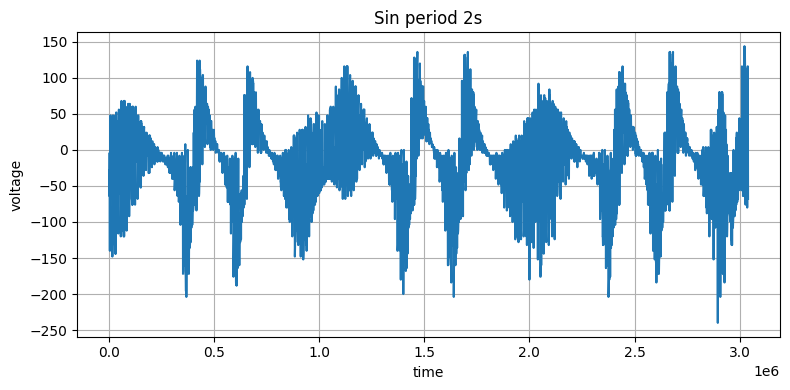

In [182]:
from utils.plot_df import plot_df

plot_df(data_sin2, title="Sin period 2s")

 Valor central original -15.70000023394823


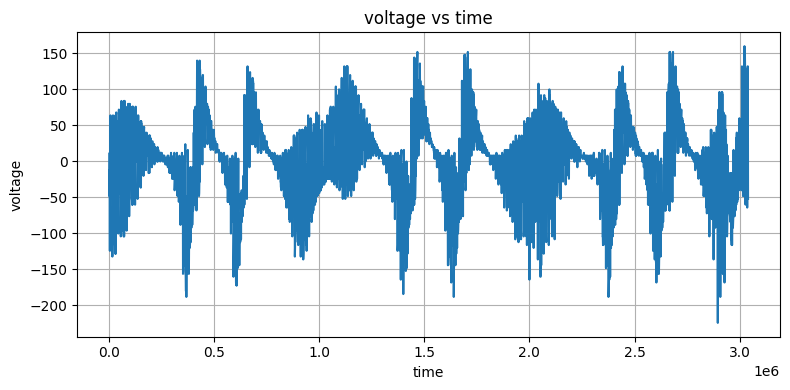

In [183]:
from utils.calibrate_df import centering_voltage, sustraction_noise_pos_neg

center_sin2, dispSin2 = centering_voltage(data_sin2)
plot_df(center_sin2)

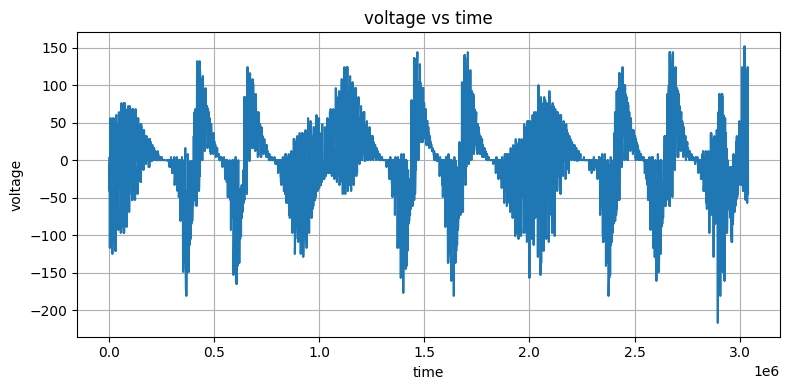

In [184]:
calibrate_sin2 = sustraction_noise_pos_neg(center_sin2, dV_m, dV_p)
plot_df(calibrate_sin2)

In [185]:
calibrate_sin2 = calibrate_sin2.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_sin2.to_csv("calibrate_data/sin/calibrate_sin2.csv", index=False)

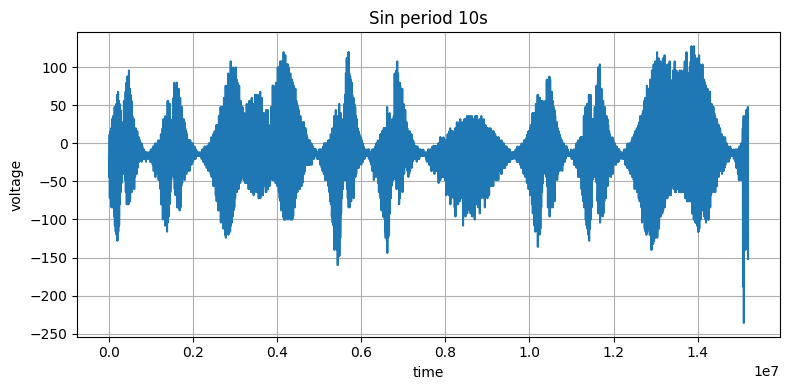

In [187]:
meta_sin10, data_sin10 = procesar_owon_sin(df_sin10)

plot_df(data_sin10, title="Sin period 10s")

 Valor central original -13.39868441018227


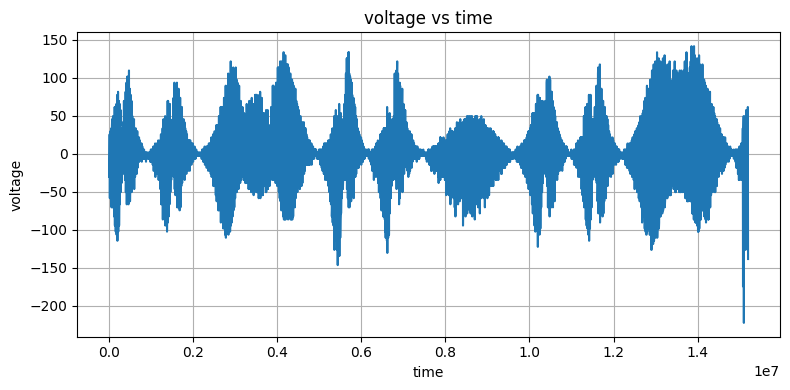

In [188]:
center_sin10, dispSin10 = centering_voltage(data_sin10)
plot_df(center_sin10)

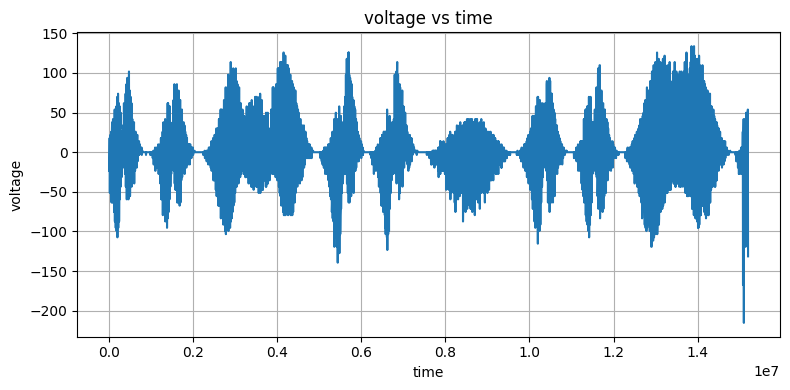

In [189]:
calibrate_sin10 = sustraction_noise_pos_neg(center_sin10, dV_m, dV_p)
plot_df(calibrate_sin10)

In [190]:
calibrate_sin10 = calibrate_sin10.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_sin10.to_csv("calibrate_data/sin/calibrate_sin10.csv", index=False)

## Pulsos

In [191]:
df_p1 = pd.read_excel("DatosInterferometria/p1.xlsx")
df_p2 = pd.read_excel("DatosInterferometria/p2.xlsx")

In [192]:
df_p1.head()

Unnamed: 0 Unnamed: 1          CH1
0  Frequency:        NaN     5.756 Hz
1     Period:        NaN   173.721 mS
2         SP:        NaN  2500.000 uS
3      PK-PK:        NaN   408.000 mV
4  Units:(mV)        NaN          NaN

In [193]:
df_p2.head()

Unnamed: 0 Unnamed: 1          CH1
0  Frequency:        NaN     9.893 Hz
1     Period:        NaN   101.081 mS
2         SP:        NaN  2500.000 uS
3      PK-PK:        NaN   364.000 mV
4  Units:(mV)        NaN          NaN

Como la estructura es la misma que la de las señales senozoidales podemos hacer uso de las funciones implementadas para estas.

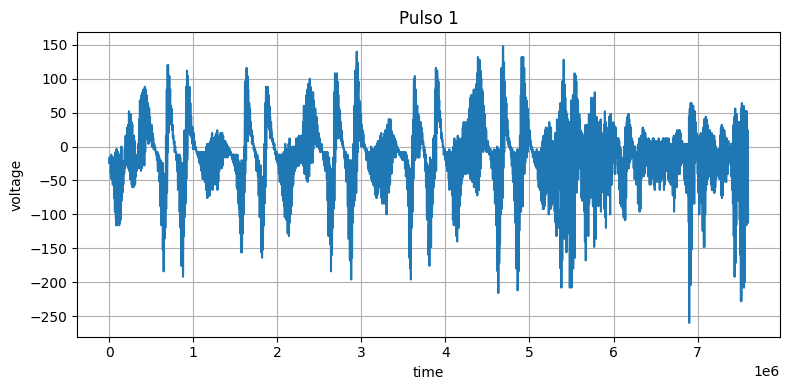

In [ ]:
meta_p1, data_p1 = procesar_owon_sin(df_p1)

plot_df(data_p1, title="Sin - Pulso 1")

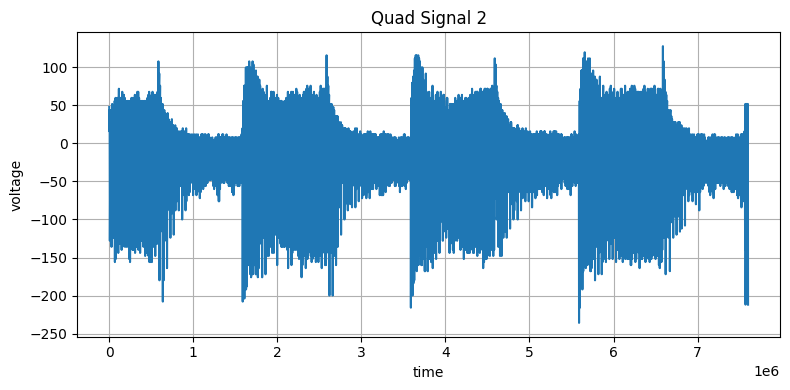

In [198]:
meta_p2, data_p2 = procesar_owon_sin(df_p2)

plot_df(data_p2, title="Quad Signal 2")

Vemos en ambas la presencia de interferencia por pulsación del botón de guardado, en p1 esta aparece dos veces (línea voltaje -200:50) y en p2 una sola vez, por lo que para p2 podemos cortar desde 7e6, mientras que para p1 el corte es en 6.5e6.

### Cortar, centrar y restar P1

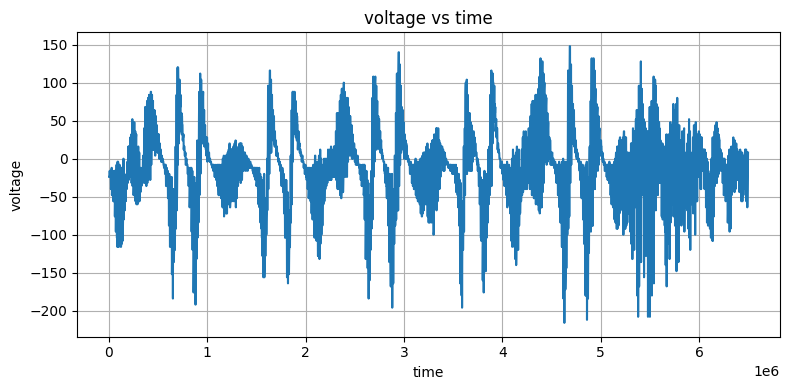

In [196]:
p1_cut = data_p1[data_p1["time"]<6.5e6]
plot_df(p1_cut)

 Valor central original -14.451712412346138


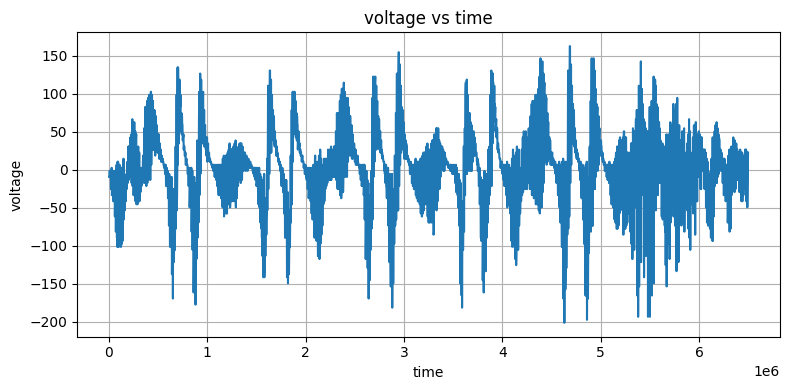

In [197]:
center_p1, dispP1 = centering_voltage(p1_cut)
plot_df(center_p1)

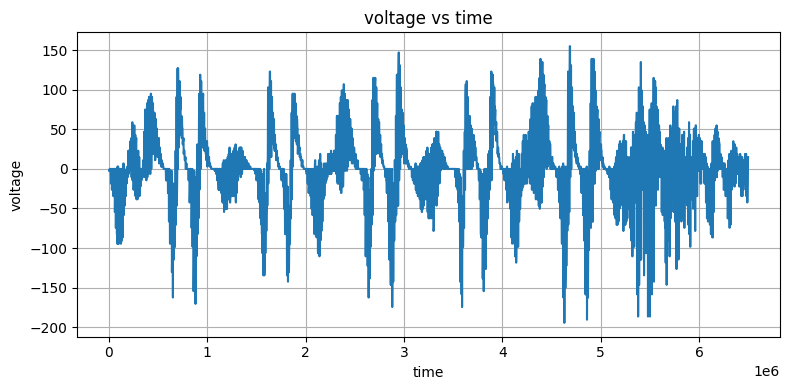

In [199]:
calibrate_p1 = sustraction_noise_pos_neg(center_p1, dV_m, dV_p)
plot_df(calibrate_p1)

In [200]:
calibrate_p1 = calibrate_p1.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_p1.to_csv("calibrate_data/pulse/calibrate_p1.csv", index=False)

### Cortar, centrar y restar P2

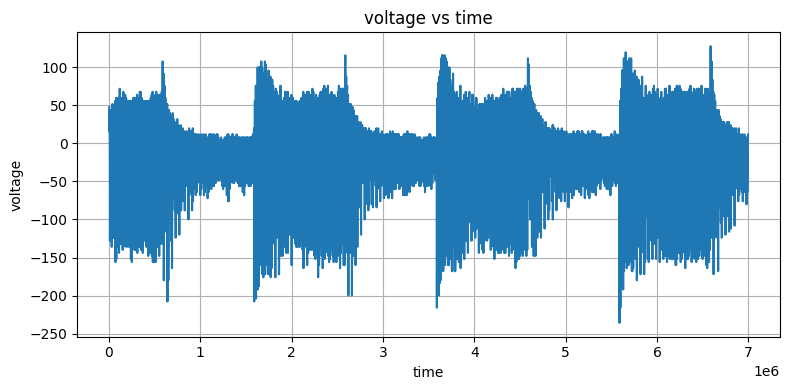

In [201]:
p2_cut = data_p2[data_p2["time"]<7e6]
plot_df(p2_cut)

 Valor central original -19.722758421794822


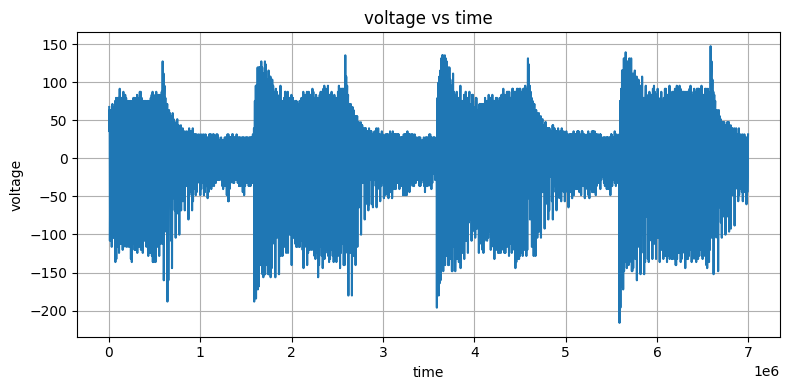

In [202]:
center_p2, dispP2 = centering_voltage(p2_cut)
plot_df(center_p2)

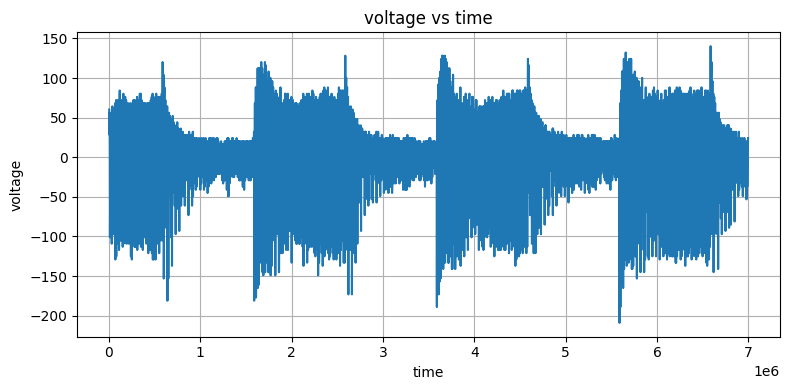

In [203]:
calibrate_p2 = sustraction_noise_pos_neg(center_p2, dV_m, dV_p)
plot_df(calibrate_p2)

In [204]:
calibrate_p2 = calibrate_p2.rename(columns={
                "time":"time_uS",
                "voltage":"Voltage_mV"
                })

calibrate_p2.to_csv("calibrate_data/pulse/calibrate_p2.csv", index=False)